#### <font color=blue> **TRABAJO PRESENTADO POR: JOANNA ANDREA ARBOLEDA GALLEGO** 




### <font color=blue> **Proyecto 03 - Series de Tiempo**


## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

Se descarga los años 2017, 2018 ,2019 y 2020**

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

# <font color=blue> **A - Análisis Exploratorio de Datos**

En esta sección, voy  realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati descargado para el proyecto 2. 


1. El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.
2. Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.

#### <font color=blue> 0.  **Importa las librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from statsmodels import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import acf
from matplotlib.ticker import ScalarFormatter

from plotly import express as px
from plotly import graph_objects as go
from plotly import figure_factory as ff
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
#from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### <font color=blue> 1. **Carga el dataset** usando las funcionalidades de Pandas. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# CArgar dataset
engine='python'

data_FlujoVehicular_2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2019.csv")
data_FlujoVehicular_2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2018.csv")
data_FlujoVehicular_2017 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2017.csv")


#### <font color=blue>  1.1. Imprimir cuántas **filas y columnas** tienen los dataset.

In [5]:
print(' Numero Filas y columnas data_FlujoVehicular_2019: ' + str(data_FlujoVehicular_2019.shape))
print(' Numero Filas y columnas data_FlujoVehicular_2018: ' + str(data_FlujoVehicular_2018.shape))
print(' Numero Filas y columnas data_FlujoVehicular_2017: ' + str(data_FlujoVehicular_2017.shape))

 Numero Filas y columnas data_FlujoVehicular_2019: (812153, 10)
 Numero Filas y columnas data_FlujoVehicular_2018: (1375908, 10)
 Numero Filas y columnas data_FlujoVehicular_2017: (1372645, 10)


  #### <font color=blue>  1.2. imprimir las **primeros cinco instancias** e información del dataset

####<font color=blue>  **Data flujo vehicular 2019**

In [6]:
data_FlujoVehicular_2019.info()
data_FlujoVehicular_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


####<font color=blue>  **Data flujo vehicular 2018**

In [7]:
data_FlujoVehicular_2018.info()
data_FlujoVehicular_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


####<font color=blue>  **Data flujo vehicular 2017**

In [8]:
data_FlujoVehicular_2017.info()
data_FlujoVehicular_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


#### <font color=blue>  1.3. Imprimir **numero de filas por columna**, no se incluyen las nulas

<font color=blue>  **Data flujo vehicular 2019** no se encuentra data nula

In [9]:
data_FlujoVehicular_2019.count()

periodo           812153
fecha             812153
hora_inicio       812153
hora_fin          812153
dia               812153
estacion          812153
sentido           812153
tipo_vehiculo     812153
forma_pago        812153
cantidad_pasos    812153
dtype: int64

<font color=blue>  **Data flujo vehicular 2018**,  no se encuentra data nula

In [10]:
data_FlujoVehicular_2018.count()

periodo           1375908
fecha             1375908
hora_inicio       1375908
hora_fin          1375908
dia               1375908
estacion          1375908
sentido           1375908
tipo_vehiculo     1375908
forma_pago        1375908
cantidad_pasos    1375908
dtype: int64

<font color=blue>  **Data flujo vehicular 2017**,  no se encuentra data nula

In [11]:
data_FlujoVehicular_2017.count()

periodo           1372645
fecha             1372645
hora_inicio       1372645
hora_fin          1372645
dia               1372645
estacion          1372645
sentido           1372645
tipo_vehiculo     1372645
forma_pago        1372645
cantidad_pasos    1372645
dtype: int64

#### <font color=blue>  1.4 **Columnas de los dataset, Tienen las mismas columnas**

<font color=blue> los dataset cuentan con las siguientes columnas con la siguiente información:

<font color=blue> **a. periodo**: año del dataset 

<font color=blue> **b. fecha**: año dia mes

<font color=blue> **c. hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

<font color=blue> **d. hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

<font color=blue> **e. dia**: dia de la semana 

<font color=blue> **f. estacion**: estaciones de peaje,

<font color=blue> **g. sentido**: Centro o Provincia

<font color=blue> **h. tipo_vehiculo**: Liviano o Pesado

<font color=blue> **i. forma_pago**: Hay varias y varian entre los años.

<font color=blue> **j. cantidad_pasos**: Cantidad de vehiculos

<font color=blue>  **Data flujo vehicular 2019**

In [12]:
print(' Nombre columna data_FlujoVehicular_2019: ' +data_FlujoVehicular_2019.columns)

Index([' Nombre columna data_FlujoVehicular_2019: periodo',
       ' Nombre columna data_FlujoVehicular_2019: fecha',
       ' Nombre columna data_FlujoVehicular_2019: hora_inicio',
       ' Nombre columna data_FlujoVehicular_2019: hora_fin',
       ' Nombre columna data_FlujoVehicular_2019: dia',
       ' Nombre columna data_FlujoVehicular_2019: estacion',
       ' Nombre columna data_FlujoVehicular_2019: sentido',
       ' Nombre columna data_FlujoVehicular_2019: tipo_vehiculo',
       ' Nombre columna data_FlujoVehicular_2019: forma_pago',
       ' Nombre columna data_FlujoVehicular_2019: cantidad_pasos'],
      dtype='object')


<font color=blue>  **Data flujo vehicular 2018**

In [13]:
print(' Nombre columna data_FlujoVehicular_2018: ' +data_FlujoVehicular_2018.columns)

Index([' Nombre columna data_FlujoVehicular_2018: periodo',
       ' Nombre columna data_FlujoVehicular_2018: fecha',
       ' Nombre columna data_FlujoVehicular_2018: hora_inicio',
       ' Nombre columna data_FlujoVehicular_2018: hora_fin',
       ' Nombre columna data_FlujoVehicular_2018: dia',
       ' Nombre columna data_FlujoVehicular_2018: estacion',
       ' Nombre columna data_FlujoVehicular_2018: sentido',
       ' Nombre columna data_FlujoVehicular_2018: tipo_vehiculo',
       ' Nombre columna data_FlujoVehicular_2018: forma_pago',
       ' Nombre columna data_FlujoVehicular_2018: cantidad_pasos'],
      dtype='object')


<font color=blue>  **Data flujo vehicular 2017**

In [14]:
print(' Nombre columna data_FlujoVehicular_2017: ' +data_FlujoVehicular_2017.columns)

Index([' Nombre columna data_FlujoVehicular_2017: periodo',
       ' Nombre columna data_FlujoVehicular_2017: fecha',
       ' Nombre columna data_FlujoVehicular_2017: hora_inicio',
       ' Nombre columna data_FlujoVehicular_2017: hora_fin',
       ' Nombre columna data_FlujoVehicular_2017: dia',
       ' Nombre columna data_FlujoVehicular_2017: estacion',
       ' Nombre columna data_FlujoVehicular_2017: sentido',
       ' Nombre columna data_FlujoVehicular_2017: tipo_vehiculo',
       ' Nombre columna data_FlujoVehicular_2017: forma_pago',
       ' Nombre columna data_FlujoVehicular_2017: cantidad_pasos'],
      dtype='object')


#### <font color=blue>  1.5 . **Consultar  información estadística de los datos del dataset.**

#### <font color=blue>  Esta información incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.

<font color=blue>  **Data flujo vehicular 2019**

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)#dar formato para visualizar mejor
data_FlujoVehicular_2019.describe()

,periodo,hora_inicio,hora_fin,cantidad_pasos
count,812153.000,812153.000,812153.000,812153.000
mean,2019.000,11.877,11.958,156.018
std,0.000,6.676,6.734,387.349
min,2019.000,0.000,0.000,1.000
25%,2019.000,6.000,7.000,4.000
50%,2019.000,12.000,12.000,15.000
75%,2019.000,18.000,18.000,72.000
max,2019.000,23.000,23.000,6677.000


<font color=blue>  **Data flujo vehicular 2018**

In [16]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)#dar formato para visualizar mejor
data_FlujoVehicular_2018.describe()

,periodo,hora_inicio,hora_fin,cantidad_pasos
count,1375908.000,1375908.000,1375908.000,1375908.000
mean,2018.000,11.980,12.118,89.464
std,0.000,6.539,6.611,291.091
min,2018.000,0.000,0.000,1.000
25%,2018.000,7.000,7.000,2.000
50%,2018.000,12.000,12.000,6.000
75%,2018.000,17.000,18.000,26.000
max,2018.000,23.000,23.000,5722.000


<font color=blue>  **Data flujo vehicular 2017**

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)#dar formato para visualizar mejor
data_FlujoVehicular_2017.describe()

,periodo,hora_inicio,hora_fin,cantidad_pasos
count,1372645.000,1372645.000,1372645.000,1372645.000
mean,2017.000,11.971,12.100,90.944
std,0.000,6.571,6.642,301.638
min,2017.000,0.000,0.000,1.000
25%,2017.000,7.000,7.000,2.000
50%,2017.000,12.000,12.000,7.000
75%,2017.000,17.000,18.000,28.000
max,2017.000,23.000,23.000,4271.000


#### <font color=blue>  2 . **Exploración inicial.**


<font color=blue> Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

#### <font color=blue>  2.1 **Estacion.**

<font color=blue>* **Dellepiane** es la estación mas usada en **2019**, mientras que  **Avellaneda**  es la mas usada el **2018** y **2017**               
<font color=blue>* **Dellepiane** se unifica en **2019**, antes habia **Dellepiane Liniers** y **Centro**, y se agrega **PDB**            
<font color=blue>* **Salguero** es la estación de menos uso en **2019** y **2017** , mientras que **Sarmiento** es la menos usada en **2018**


####<font color=blue>  **Data flujo vehicular 2019**

In [18]:
print('\nEstaciones para el año 2019:')
data_FlujoVehicular_2019.estacion.value_counts()


Estaciones para el año 2019:


Dellepiane    187600
Avellaneda    186443
Illia         161133
Alberti       132279
Retiro         53975
PDB            40964
Sarmiento      24890
Salguero       24869
Name: estacion, dtype: int64

Text(0.5, 1.0, 'Distribucion por estaciones 2019')

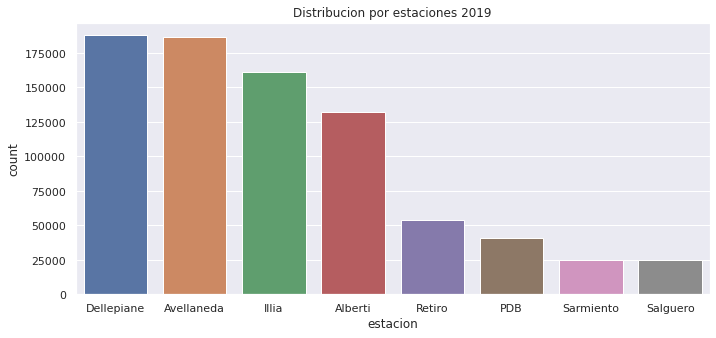

In [19]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.countplot(data=data_FlujoVehicular_2019,x="estacion",order=data_FlujoVehicular_2019["estacion"].value_counts().index)
plt.title("Distribucion por estaciones 2019")

#### <font color=blue>  **Data flujo vehicular 2018**

In [20]:
print('\nEstaciones para el año 2018:')
data_FlujoVehicular_2018.estacion.value_counts()


Estaciones para el año 2018:


Avellaneda            394371
Illia                 299519
Dellepiane Centro     176745
Dellepiane Liniers    176696
Alberdi               153037
Retiro                119969
Salguero               28058
Sarmiento              27513
Name: estacion, dtype: int64

Text(0.5, 1.0, 'Distribucion por estaciones 2018')

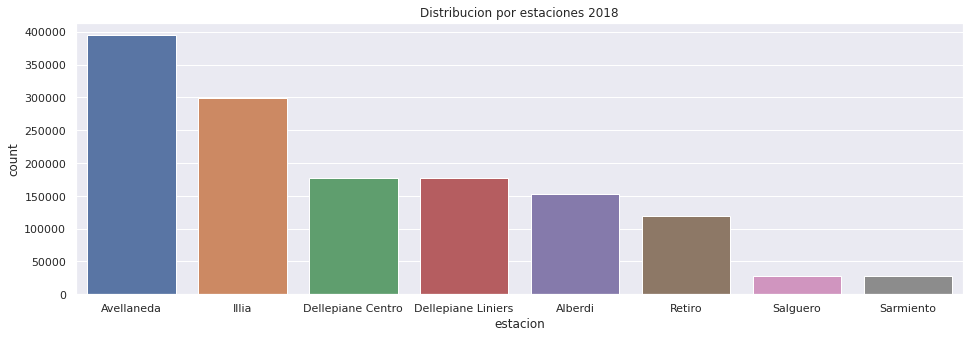

In [21]:
plt.figure(figsize=(35,5))
plt.subplot(1,2,1)
sns.countplot(data=data_FlujoVehicular_2018,x="estacion",order=data_FlujoVehicular_2018["estacion"].value_counts().index)
plt.title("Distribucion por estaciones 2018")

####<font color=blue>  **Data flujo vehicular 2017**

In [22]:
print('\nEstaciones para el año 2017:')
data_FlujoVehicular_2017.estacion.value_counts()


Estaciones para el año 2017:


Avellaneda            391842
Illia                 291900
Dellepiane Centro     180140
Dellepiane Liniers    176984
Alberdi               150583
Retiro                133584
Sarmiento              24231
Salguero               23381
Name: estacion, dtype: int64

Text(0.5, 1.0, 'Distribucion por estaciones 2017')

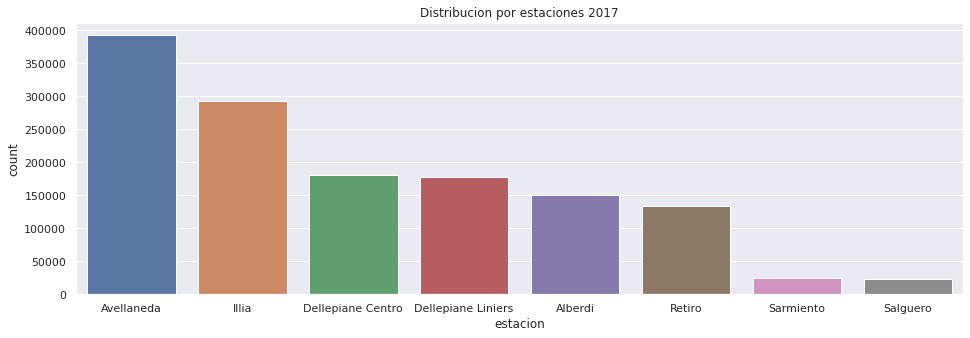

In [23]:
plt.figure(figsize=(35,5))
plt.subplot(1,2,1)
sns.countplot(data=data_FlujoVehicular_2017,x="estacion",order=data_FlujoVehicular_2017["estacion"].value_counts().index)
plt.title("Distribucion por estaciones 2017")

#### <font color=blue>  2.2 **Sentido.**

<font color=blue> El mayor flujo de vehiculos en los tres años (2019, 2018, 2017) ha sido hacia **Provincia**

In [24]:
print('\nSentido para el año 2019:')
data_FlujoVehicular_2019.sentido.value_counts()


Sentido para el año 2019:


Provincia    462729
Centro       349424
Name: sentido, dtype: int64

In [25]:
print('\nSentido para el año 2018:')
data_FlujoVehicular_2018.sentido.value_counts()


Sentido para el año 2018:


Provincia    779678
Centro       596230
Name: sentido, dtype: int64

In [26]:
print('\nSentido para el año 2017:')
data_FlujoVehicular_2017.sentido.value_counts()


Sentido para el año 2017:


Provincia    768448
Centro       604197
Name: sentido, dtype: int64

#### <font color=blue>  2.3 **Tipo de vehiculo.**

<font color=blue>* Para los  años **2017 y 2018** el mayor flujo de vehículos fue el tipo de vehicuo  **Pesado**

<font color=blue>* Para el año **2019** el mayor flujo de vehículos fue el tipo de vehicuo  **Liviano**

In [27]:
print('\Tipo de vehículo para el año 2019:')
data_FlujoVehicular_2019.tipo_vehiculo.value_counts()

\Tipo de vehículo para el año 2019:


Liviano    479684
Pesado     332469
Name: tipo_vehiculo, dtype: int64

In [28]:
print('\nTipo de vehículo para el año 2018:')
data_FlujoVehicular_2018.tipo_vehiculo.value_counts()


Tipo de vehículo para el año 2018:


Pesado     757635
Liviano    618273
Name: tipo_vehiculo, dtype: int64

In [29]:
print('\nTipo de vehículo para el año 2017:')
data_FlujoVehicular_2017.tipo_vehiculo.value_counts()


Tipo de vehículo para el año 2017:


Pesado     774210
Liviano    598435
Name: tipo_vehiculo, dtype: int64

#### <font color=blue>  2.4 **Forma de Pago**

<font color=blue>* La forma de pago mas usada en **2017** fue el **Efectivo**

<font color=blue>* La forma de pago mas usada en **2018 y 2019** fue el **Telepase**

<font color=blue>* PAra el **2019** la forma de pago  **TARJETA DISCAPACIDAD** cambia por el nombre de **T. DISCAPACIDAD**

<font color=blue>* PAra el **2017** se tenian las formas de pago  **Monedero** y  **Otro**

####<font color=blue>  **Data flujo vehicular 2019**

In [30]:
print('\nforma de pago para el año 2019:')
data_FlujoVehicular_2019.forma_pago.value_counts()


forma de pago para el año 2019:


TELEPASE           201388
EFECTIVO           149340
NO COBRADO         141280
EXENTO             132716
INFRACCION         111428
T. DISCAPACIDAD     76001
Name: forma_pago, dtype: int64

Text(0.5, 1.0, 'Distribucion por forma de pago 2019')

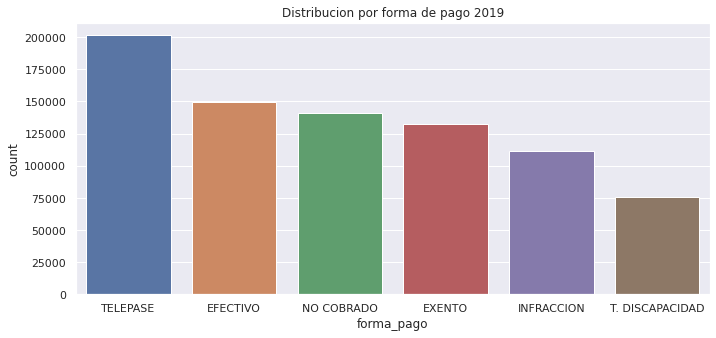

In [31]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.countplot(data=data_FlujoVehicular_2019,x="forma_pago",order=data_FlujoVehicular_2019["forma_pago"].value_counts().index)
plt.title("Distribucion por forma de pago 2019")

####<font color=blue>  **Data flujo vehicular 2018**

In [34]:
print('\nforma de pago para el año 2018:')
data_FlujoVehicular_2018.forma_pago.value_counts()


forma de pago para el año 2018:


TELEPASE                429053
EFECTIVO                423633
EXENTO                  162103
INFRACCION              153331
NO COBRADO              121440
TARJETA DISCAPACIDAD     86348
Name: forma_pago, dtype: int64

Text(0.5, 1.0, 'Distribucion por forma de pago 2018')

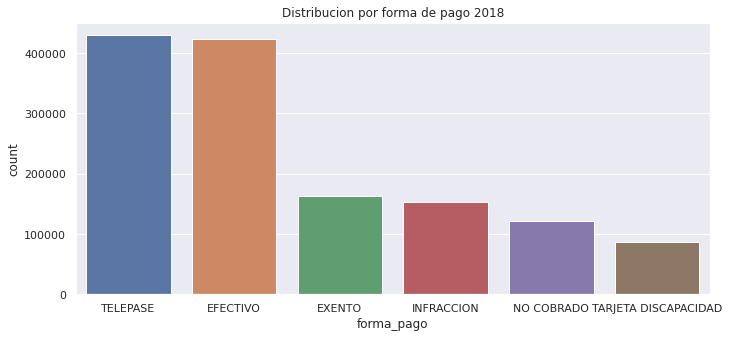

In [35]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.countplot(data=data_FlujoVehicular_2018,x="forma_pago",order=data_FlujoVehicular_2018["forma_pago"].value_counts().index)
plt.title("Distribucion por forma de pago 2018")

####<font color=blue>  **Data flujo vehicular 2017**

In [36]:
print('\nforma de pago para el año 2017:')
data_FlujoVehicular_2017.forma_pago.value_counts()


forma de pago para el año 2017:


EFECTIVO                447203
TELEPASE                397420
EXENTO                  169889
INFRACCION              140275
NO COBRADO              117730
TARJETA DISCAPACIDAD    100106
MONEDERO                    14
Otros                        8
Name: forma_pago, dtype: int64

Text(0.5, 1.0, 'Distribucion por forma de pago 2017')

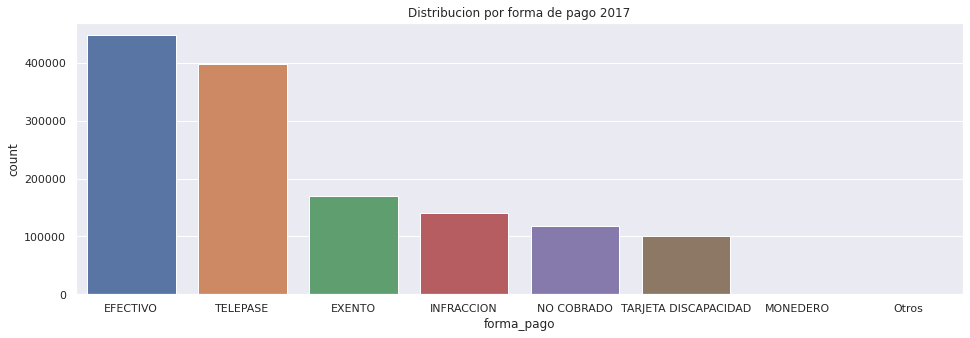

In [37]:
plt.figure(figsize=(35,5))
plt.subplot(1,2,1)
sns.countplot(data=data_FlujoVehicular_2017,x="forma_pago",order=data_FlujoVehicular_2017["forma_pago"].value_counts().index)
plt.title("Distribucion por forma de pago 2017")

#### <font color=blue> **2.5 Eligir preguntas a partir del  dataset.**

#### <font color=blue> **a. Cantidad de vehìculos registrados en la autopista Ilia para  forma de pago Efectivo por trimestre** 

<font color=blue> **Para el año 2017**

<font color=blue> * el CUARTO semestre fue el de mas flujo vehicular

<font color=blue> * el SEGUNDO semestre fue el de menos flujo vehicular

In [38]:
filtered_df_t1=data_FlujoVehicular_2017.query("estacion == 'Illia' and   forma_pago == 'EFECTIVO' and  (fecha >= '2017-01-01' and fecha <='2017-03-31') ")
filtered_df_t1['trimestre']='PRIMERO'

filtered_df_t2=data_FlujoVehicular_2017.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2017-04-01' and fecha <='2017-06-30') ")
filtered_df_t2['trimestre']='SEGUNDO'

filtered_df_t3=data_FlujoVehicular_2017.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2017-07-01' and fecha <='2017-09-30') ")
filtered_df_t3['trimestre']='TERCERO'

filtered_df_t4=data_FlujoVehicular_2017.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2017-10-01' and fecha <='2017-12-31') ")
filtered_df_t4['trimestre']='CUARTO'

dataset_trimestres_2017 = pd.concat([filtered_df_t1, filtered_df_t2, filtered_df_t3,filtered_df_t4])
filtered_trimestres_2017= dataset_trimestres_2017[dataset_trimestres_2017.columns[9:11]]
filtered_trimestres_2017=filtered_trimestres_2017.groupby(['trimestre']).sum()
filtered_trimestres_2017



,cantidad_pasos
trimestre,
CUARTO,4699961
PRIMERO,4379587
SEGUNDO,4189585
TERCERO,4514379


<font color=blue> **Para el año 2018**

<font color=blue> * el PRIMER semestre fue el de mas flujo vehicular

<font color=blue> * el CUARTO semestre fue el de menos flujo vehicular

In [39]:
filtered_df_t1=data_FlujoVehicular_2018.query("estacion == 'Illia' and   forma_pago == 'EFECTIVO' and  (fecha >= '2018-01-01' and fecha <='2018-03-31') ")
filtered_df_t1['trimestre']='PRIMERO'

filtered_df_t2=data_FlujoVehicular_2018.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2018-04-01' and fecha <='2018-06-30') ")
filtered_df_t2['trimestre']='SEGUNDO'

filtered_df_t3=data_FlujoVehicular_2018.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2018-07-01' and fecha <='2018-09-30') ")
filtered_df_t3['trimestre']='TERCERO'

filtered_df_t4=data_FlujoVehicular_2018.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2018-10-01' and fecha <='2018-12-31') ")
filtered_df_t4['trimestre']='CUARTO'

dataset_trimestres_2018 = pd.concat([filtered_df_t1, filtered_df_t2, filtered_df_t3,filtered_df_t4])
filtered_trimestres_2018= dataset_trimestres_2018[dataset_trimestres_2018.columns[9:11]]
filtered_trimestres_2018=filtered_trimestres_2018.groupby(['trimestre']).sum()
filtered_trimestres_2018

,cantidad_pasos
trimestre,
CUARTO,3763829
PRIMERO,4301592
SEGUNDO,4028778
TERCERO,3872745


<font color=blue> * **Para el Año 2019** 

<font color=blue> * el TERCER semestre fue el de mas flujo

<font color=blue> * el PRIMER semestre fue el de menos flujo 

In [40]:
filtered_df_t1=data_FlujoVehicular_2019.query("estacion == 'Illia' and   forma_pago == 'EFECTIVO' and  (fecha >= '2019-01-01' and fecha <='2019-03-31') ")
filtered_df_t1['trimestre']='PRIMERO'

filtered_df_t2=data_FlujoVehicular_2019.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2019-04-01' and fecha <='2019-06-30') ")
filtered_df_t2['trimestre']='SEGUNDO'

filtered_df_t3=data_FlujoVehicular_2019.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2019-07-01' and fecha <='2019-09-30') ")
filtered_df_t3['trimestre']='TERCERO'

filtered_df_t4=data_FlujoVehicular_2019.query("estacion == 'Illia' and forma_pago == 'EFECTIVO' and  (fecha >= '2019-10-01' and fecha <='2019-12-31') ")
filtered_df_t4['trimestre']='CUARTO'

dataset_trimestres_2019 = pd.concat([filtered_df_t1, filtered_df_t2, filtered_df_t3,filtered_df_t4])
filtered_trimestres_2019= dataset_trimestres_2019[dataset_trimestres_2019.columns[9:11]]
filtered_trimestres_2019=filtered_trimestres_2019.groupby(['trimestre']).sum()
filtered_trimestres_2019

,cantidad_pasos
trimestre,
CUARTO,3513852
PRIMERO,3505635
SEGUNDO,3429323
TERCERO,3666315


<font color=red> **OBSERVACION:** Tomando la data inicial del 2017, se nota disminución año a año (2018,2019) de la forma de pago en EFECTIVO y se ve aumento de las OTRAS formas de pago

#### <font color=blue> **b. Cantidad de vehìculos registrados en la autopista Ilia por año** 



<font color=blue> Cada año disminuye el flujo de vehículos

In [41]:
# concateno los dataset
dataset_flujovehicular= pd.concat([data_FlujoVehicular_2017, data_FlujoVehicular_2018, data_FlujoVehicular_2019])

In [42]:
# Filtro por estaciòn Ilia y forma de pago igual a efectivo
filtered_Ilia_efectivo=dataset_flujovehicular.query("estacion == 'Illia' and   forma_pago =='EFECTIVO'  ")
filtered_Ilia_otros=dataset_flujovehicular.query("estacion == 'Illia' and   forma_pago !='EFECTIVO'  ")

In [44]:
# realizo copia para utilizar dataser en las series de tiempo
filtered_Ilia_efectivo_st =filtered_Ilia_efectivo.copy()

Text(0.5, 1.0, 'Distribucion por cantidad de vehiculos/pago effectivo ')

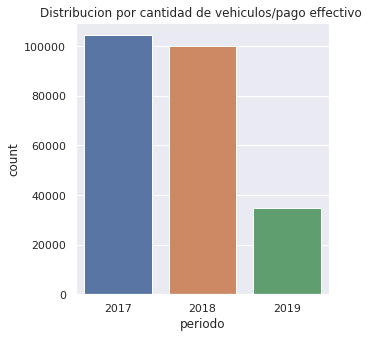

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.countplot(data=filtered_Ilia_efectivo,x="periodo",order=filtered_Ilia_efectivo["periodo"].value_counts().index)
plt.title("Distribucion por cantidad de vehiculos/pago effectivo ")


Text(0.5, 1.0, 'Distribucion por cantidad de vehiculos/pago otros ')

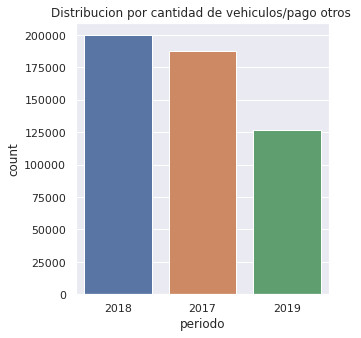

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.countplot(data=filtered_Ilia_otros,x="periodo",order=filtered_Ilia_otros["periodo"].value_counts().index)
plt.title("Distribucion por cantidad de vehiculos/pago otros ")

#### <font color=blue> **c. cantidad de vehículos por sentido  y por años por la autopista Ilia**

<font color=blue> **Se puede observar un comportamiento similar tanto en los sentidos como en cantidad por año.**

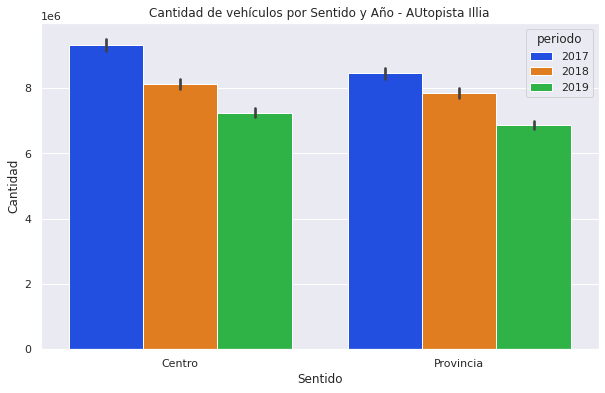

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=filtered_Ilia_efectivo.sentido, y=filtered_Ilia_efectivo.cantidad_pasos, hue=filtered_Ilia_efectivo.periodo, estimator=np.sum, palette='bright')
plt.title('Cantidad de vehículos por Sentido y Año - AUtopista Illia')
plt.xlabel('Sentido')
plt.ylabel('Cantidad')
plt.show();

In [48]:
vehículosxsentido = filtered_Ilia_efectivo.groupby("sentido").sum().sort_values('cantidad_pasos', ascending=False)
vehículosxsentido.drop(columns=['periodo', 'hora_fin','hora_inicio'], inplace = True)
vehículosxsentido

,cantidad_pasos
sentido,
Centro,24707366
Provincia,23158215


#### <font color=blue> **d. Los días y horarios de mayor tráfico vehicular**

#### <font color=blue>  **Filtrando el Dataset:** Voy a trabajar con la estación **Illia** y la forma de pago **Efectivo** --> **filtered_Ilia_efectivo**


<font color=blue> * Se quitan las  columnas que no se van  a utilizar


In [49]:
filtered_Ilia_efectivo.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
filtered_Ilia_efectivo.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
1750,2017-01-01,1,Domingo,Centro,Liviano,1
1755,2017-01-01,2,Domingo,Centro,Liviano,10
1757,2017-01-01,2,Domingo,Centro,Liviano,783
1761,2017-01-01,2,Domingo,Centro,Pesado,3
1764,2017-01-01,3,Domingo,Centro,Liviano,14


<font color=blue> * Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora


In [50]:
filtered_Ilia_efectivo['fecha2'] = pd.to_datetime(filtered_Ilia_efectivo.fecha) + pd.to_timedelta(filtered_Ilia_efectivo.hora_fin, unit = 'h')

<font color=blue> * Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2

In [51]:
filtered_Ilia_efectivo.drop(columns=['fecha'], inplace = True)

filtered_Ilia_efectivo.head()

,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
1750,1,Domingo,Centro,Liviano,1,2017-01-01 01:00:00
1755,2,Domingo,Centro,Liviano,10,2017-01-01 02:00:00
1757,2,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
1761,2,Domingo,Centro,Pesado,3,2017-01-01 02:00:00
1764,3,Domingo,Centro,Liviano,14,2017-01-01 03:00:00


<font color=blue> *  Corregimos el nombre de fecha2 a fecha

In [52]:
filtered_Ilia_efectivo.rename(columns = {'fecha2':'fecha'}, inplace = True) 
filtered_Ilia_efectivo.head()


,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
1750,1,Domingo,Centro,Liviano,1,2017-01-01 01:00:00
1755,2,Domingo,Centro,Liviano,10,2017-01-01 02:00:00
1757,2,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
1761,2,Domingo,Centro,Pesado,3,2017-01-01 02:00:00
1764,3,Domingo,Centro,Liviano,14,2017-01-01 03:00:00


<font color=blue> * Reordenamos el dataset por fecha

In [53]:
filtered_Ilia_efectivo.sort_values('fecha', inplace = True)
filtered_Ilia_efectivo.reset_index(drop=True, inplace = True)
filtered_Ilia_efectivo

,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
2,0,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
3,0,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
4,0,Domingo,Centro,Liviano,23,2017-01-01 00:00:00
...,...,...,...,...,...,...
238864,22,Martes,Centro,Pesado,2,2019-12-31 22:00:00
238865,22,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238866,22,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238867,23,Martes,Centro,Liviano,214,2019-12-31 23:00:00


<font color=blue>  * el promedio de vehiculos por hora para los años evaluados es de 200 vehículos por hora y la desviación estandar es 403.

In [54]:
filtered_Ilia_efectivo.describe()

,hora_fin,cantidad_pasos
count,238869.000,238869.000
mean,11.875,200.384
std,6.739,403.247
min,0.000,1.000
25%,6.000,2.000
50%,12.000,11.000
75%,18.000,104.000
max,23.000,2416.000


<font color=blue>* Verificar todas las fechas y horas cuyo registro de vehículos supere al **promedio + desviacion estandar:**



In [55]:
# calculo media y standar
mean_illia_ef = filtered_Ilia_efectivo.cantidad_pasos.mean()
print('Media: ',mean_illia_ef)
std_illia_ef = filtered_Ilia_efectivo.cantidad_pasos.std()
print('standar:',std_illia_ef)

Media:  200.38423152439202
standar: 403.24690366559895


In [ ]:
#  filtramos pro valores mayores al promedio + desviacion estandar
dataset_illia_mayorflujo = filtered_Ilia_efectivo[
                     (filtered_Ilia_efectivo['cantidad_pasos'] > (mean_illia_ef + std_illia_ef))
                    ]
dataset_illia_mayorflujo

,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
3,0,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
5,0,Domingo,Centro,Liviano,857,2017-01-01 00:00:00
16,2,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
21,3,Domingo,Centro,Liviano,988,2017-01-01 03:00:00
22,3,Domingo,Provincia,Liviano,704,2017-01-01 03:00:00
...,...,...,...,...,...,...
238850,18,Martes,Provincia,Liviano,643,2019-12-31 18:00:00
238855,19,Martes,Provincia,Liviano,640,2019-12-31 19:00:00
238858,20,Martes,Provincia,Liviano,773,2019-12-31 20:00:00
238860,21,Martes,Centro,Liviano,799,2019-12-31 21:00:00


#### <font color=blue> **Identificar la Hora de mayor y menor flujo vehicular**

<font color=blue>* Entre las  18hs y 19hs es el mayor flujo de vehiculos  con pago en EFECTIVO para la estacion de Ilia

<font color=blue>* Entre las  4hs y 5hs es el menor flujo de vehiculos con  pago en EFECTIVO para la estacion de Ilia

In [56]:
horas_mayor_flujo = filtered_Ilia_efectivo.groupby(filtered_Ilia_efectivo.hora_fin).sum().sort_values('cantidad_pasos', ascending=False)
#horas_mayor_flujo.drop(columns=['hora_fin'], inplace = True)
horas_mayor_flujo

,cantidad_pasos
hora_fin,
18,3115036
19,3071455
14,3005578
17,2993721
16,2969568
15,2933388
13,2907990
12,2729369
20,2661885


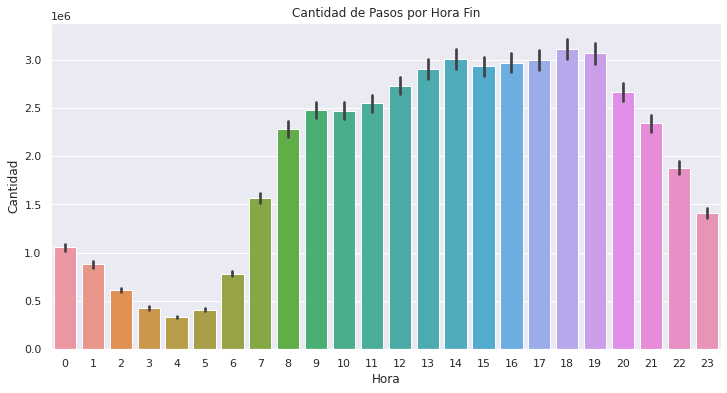

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x=filtered_Ilia_efectivo.hora_fin, y=filtered_Ilia_efectivo.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Hora Fin')
plt.ylabel('Cantidad')
plt.xlabel('Hora')
plt.show();

#### <font color=blue> **Identificar el dìa del mes con  mayor y menor flujo vehicular**


<font color=blue>* El dìa del mes con mayor flujo de vehiculos es el dìa 16 con pago en EFECTIVO para la estacion de Ilia

<font color=blue>*  El dìa del mes con menor flujo de vehiculos es el dìa 31 con pago en EFECTIVO para la estacion de Ilia

In [58]:
dia_mayor_flujo = filtered_Ilia_efectivo.groupby(filtered_Ilia_efectivo.fecha.dt.day).sum().sort_values('cantidad_pasos', ascending=False)
dia_mayor_flujo.drop(columns=['hora_fin'], inplace = True)
dia_mayor_flujo

,cantidad_pasos
fecha,
16,1627634
12,1618152
15,1617634
14,1614606
2,1614126
7,1613178
23,1611171
13,1605086
28,1604871


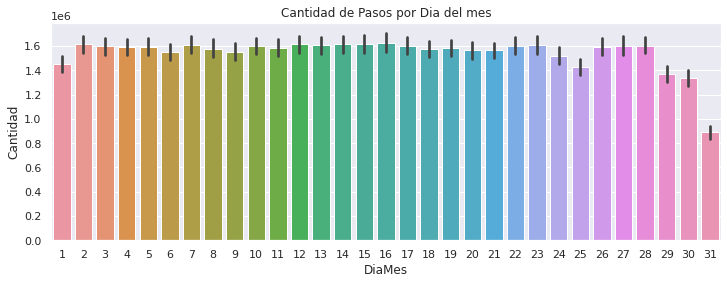

In [59]:
plt.figure(figsize=(12,4))
sns.barplot(x=filtered_Ilia_efectivo.fecha.dt.day, y=filtered_Ilia_efectivo.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Dia del mes')
plt.ylabel('Cantidad')
plt.xlabel('DiaMes')
plt.show();

#### <font color=blue> **Identificar dìa de la semana con  mayor y menor flujo vehicular**


<font color=blue>* El dìa la semana con mayor flujo de vehiculos es el dìa VIERNES con pago en EFECTIVO para la estacion de Ilia

<font color=blue>* El dìa la semana con mayor flujo de vehiculos es el dìa DOMINGO con pago en EFECTIVO para la estacion de Ilia

In [60]:
diasemana_flujo = filtered_Ilia_efectivo.groupby(filtered_Ilia_efectivo.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
diasemana_flujo.drop(columns=['hora_fin'], inplace = True)
diasemana_flujo

,cantidad_pasos
fecha,
Friday,7647272
Thursday,7302169
Wednesday,7125526
Tuesday,6865551
Monday,6691387
Saturday,6441715
Sunday,5791961


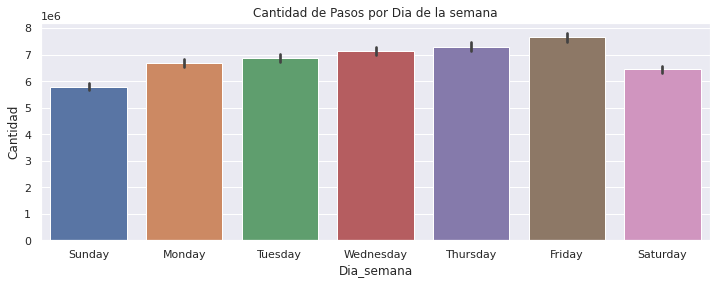

In [61]:
plt.figure(figsize=(12,4))
sns.barplot(x=filtered_Ilia_efectivo.fecha.dt.day_name(), y=filtered_Ilia_efectivo.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Dia de la semana')
plt.ylabel('Cantidad')
plt.xlabel('Dia_semana')
plt.show();

#### <font color=blue> **Identificar mes con  mayor y menor flujo vehicular**

<font color=blue>* El mes de MARZO, es el mes con mayor flujo de vehiculos con pago en EFECTIVO para la estacion de Ilia

<font color=blue>* El mes de JUNIO, es el mes con menos flujo de vehiculos con pago en EFECTIVO para la estacion de Ilia

In [62]:
mes_mayor_flujo = filtered_Ilia_efectivo.groupby(
    filtered_Ilia_efectivo.fecha.dt.month
    ).sum().sort_values('cantidad_pasos', ascending=False)
mes_mayor_flujo.drop(columns=['hora_fin'], inplace = True)
mes_mayor_flujo

,cantidad_pasos
fecha,
3,4251579
1,4129950
7,4096365
10,4062584
8,4050919
11,3987393
5,3970958
12,3927665
4,3907378


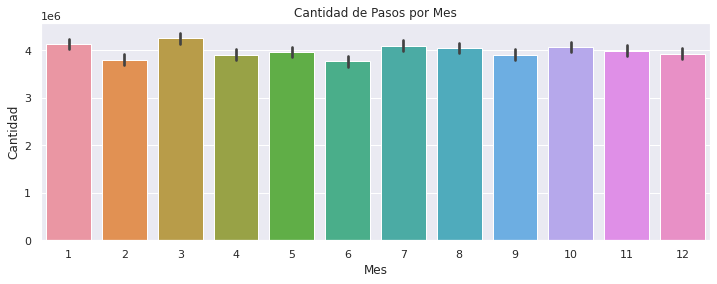

In [63]:
plt.figure(figsize=(12,4))
sns.barplot(x= filtered_Ilia_efectivo.fecha.dt.month, y=filtered_Ilia_efectivo.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Mes')
plt.ylabel('Cantidad')
plt.xlabel('Mes')
plt.show();

#### <font color=blue> **Identificar año con  mayor y menor flujo vehicular**

<font color=blue>* El año  con mayor flujo de vehiculos es 2017 con pago en EFECTIVO para la estacion de Ilia

<font color=blue>* El  con menos flujo de vehiculos es 2019 con pago en EFECTIVO para la estacion de Ilia

In [64]:
año_mayor_flujo = filtered_Ilia_efectivo.groupby(filtered_Ilia_efectivo.fecha.dt.year).sum().sort_values('cantidad_pasos', ascending=False)
año_mayor_flujo.drop(columns=['hora_fin'], inplace = True)
año_mayor_flujo

,cantidad_pasos
fecha,
2017,17783512
2018,15966944
2019,14115125


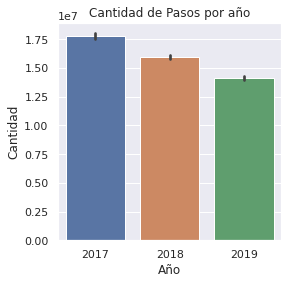

In [65]:
plt.figure(figsize=(4,4))
sns.barplot(x= filtered_Ilia_efectivo.fecha.dt.year, y=filtered_Ilia_efectivo.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por año')
plt.ylabel('Cantidad')
plt.xlabel('Año')
plt.show();

#### <font color=blue> **Identificar el sentido con  mayor y menor flujo vehicular**

<font color=blue>* El sentido  con mayor flujo de vehiculos es CENTRO con pago en EFECTIVO para la estacion de Ilia

<font color=blue>* El sentido  con menor flujo de vehiculos es PROVINCIA con pago en EFECTIVO para la estacion de Ilia

In [66]:
sentido_mayor_flujo = filtered_Ilia_efectivo.groupby("sentido").sum().sort_values('cantidad_pasos', ascending=False)
sentido_mayor_flujo.drop(columns=['hora_fin'], inplace = True)
sentido_mayor_flujo

,cantidad_pasos
sentido,
Centro,24707366
Provincia,23158215


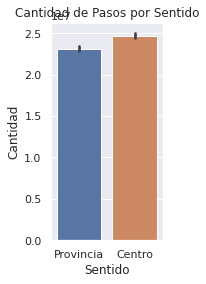

In [67]:
plt.figure(figsize=(2,4))
sns.barplot(x= filtered_Ilia_efectivo.sentido, y=filtered_Ilia_efectivo.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Sentido')
plt.ylabel('Cantidad')
plt.xlabel('Sentido')
plt.show();

#### <font color=blue> **Resampleo los datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable**

In [68]:
dataset_diario = filtered_Ilia_efectivo.resample('D', on = 'fecha').sum()
dataset_diario.drop(columns=['hora_fin'], inplace = True)
print(dataset_diario.shape)
dataset_diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


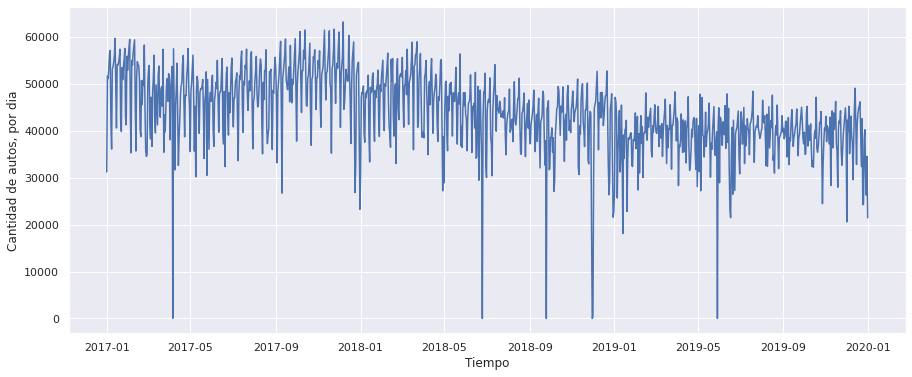

In [69]:
plt.figure(figsize = (15,6))
plt.plot(dataset_diario.index, dataset_diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

#### <font color=blue> **3. Componentes de la serie**

#### <font color=blue> **3.1 Exploratorio de datos (EDA) para cada uno de los componentes de la serie**

#### <font color=green> **No realizo series de tiempo para estacion (por que estamos con Ilia) ni para forma de pago (por que es efectivo)**

#### <font color=blue> **a. Serie de Tiempo por sentido**

<font color=blue> * Convierto la columna fecha tipo date a datetimes para poder realizar el resample:

In [70]:
filtered_Ilia_efectivo_st['fecha'] = pd.to_datetime(filtered_Ilia_efectivo_st['fecha'])

<font color=blue> * Filtro por sentido

In [71]:
sentido_1 = pd.DataFrame()
sentido_1 = filtered_Ilia_efectivo_st[filtered_Ilia_efectivo_st['sentido'] =='Centro']

sentido_2 = pd.DataFrame()
sentido_2 = filtered_Ilia_efectivo_st[filtered_Ilia_efectivo_st['sentido'] =='Provincia']

#Eliminar las columnas que no se usarán
sentido_1.drop(columns=['sentido','tipo_vehiculo','estacion','forma_pago'], inplace = True)
sentido_2.drop(columns=['sentido','tipo_vehiculo','estacion','forma_pago'], inplace = True)


<font color=blue> * Resampleo  datos para agrupar por semana

In [72]:
sentido_w_1 = sentido_1.resample('W', on = 'fecha').sum()
sentido_w_2 = sentido_2.resample('W', on = 'fecha').sum()

<font color=blue> * Genero la serie de tiempo por sentido

In [73]:
sentido_st_w = pd.DataFrame()
sentido_st_w['centro'] = sentido_w_1['cantidad_pasos']
sentido_st_w['provincia'] = sentido_w_2['cantidad_pasos']
sentido_st_w['total']=sentido_st_w['centro']+sentido_st_w['provincia']
display(sentido_st_w)

,centro,provincia,total
fecha,,,
2017-01-01,17051,14132,31183
2017-01-08,186964,160248,347212
2017-01-15,197873,168540,366413
2017-01-22,192292,164923,357215
2017-01-29,191140,163441,354581
...,...,...,...
2019-12-08,142997,139894,282891
2019-12-15,144647,128313,272960
2019-12-22,157100,135781,292881


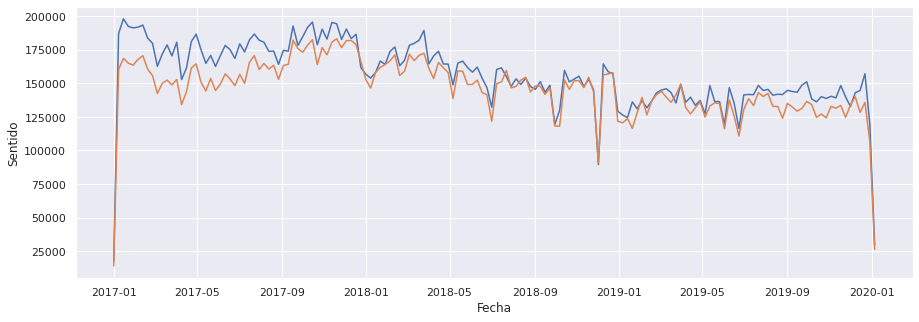

In [74]:
plt.figure(figsize=(15,5))
plt.plot(sentido_st_w.index, sentido_st_w.centro, label = 'Centro')
plt.plot(sentido_st_w.index, sentido_st_w.provincia, label = 'Provincia')
plt.ylabel('Sentido')
plt.xlabel('Fecha')
plt.show();

#### <font color=blue> **b. Serie de Tiempo por Tipo de vehiculo**

<font color=blue> * Filtro por tipo de vehìculo

In [75]:
Tipo_vehiculo_1 = pd.DataFrame()
Tipo_vehiculo_1 = filtered_Ilia_efectivo_st[filtered_Ilia_efectivo_st['tipo_vehiculo'] =='Liviano']
Tipo_vehiculo_2  = pd.DataFrame()
Tipo_vehiculo_2  = filtered_Ilia_efectivo_st[filtered_Ilia_efectivo_st['tipo_vehiculo'] =='Pesado']

#Eliminar las columnas que no se usarán
Tipo_vehiculo_1.drop(columns=['sentido','tipo_vehiculo','estacion','forma_pago'], inplace = True)
Tipo_vehiculo_2.drop(columns=['sentido','tipo_vehiculo','estacion','forma_pago'], inplace = True)

<font color=blue> * Resampleo  datos para agrupar por semana

In [76]:
Tipveh_w_1 = Tipo_vehiculo_1.resample('W', on = 'fecha').sum()
Tipveh_w_2 = Tipo_vehiculo_2.resample('W', on = 'fecha').sum()

<font color=blue> * Genero la serie de tiempo por tipo de vehiculo

In [77]:
Tipveh_st_w = pd.DataFrame()
Tipveh_st_w['liviano'] = Tipveh_w_1['cantidad_pasos']
Tipveh_st_w['pesado'] = Tipveh_w_2['cantidad_pasos']
Tipveh_st_w['total'] = Tipveh_w_1['cantidad_pasos'] + Tipveh_w_2['cantidad_pasos']
display(Tipveh_st_w)


,liviano,pesado,total
fecha,,,
2017-01-01,30641,542,31183
2017-01-08,330163,17049,347212
2017-01-15,349123,17290,366413
2017-01-22,340440,16775,357215
2017-01-29,337684,16897,354581
...,...,...,...
2019-12-08,275748,7143,282891
2019-12-15,267837,5123,272960
2019-12-22,287443,5438,292881


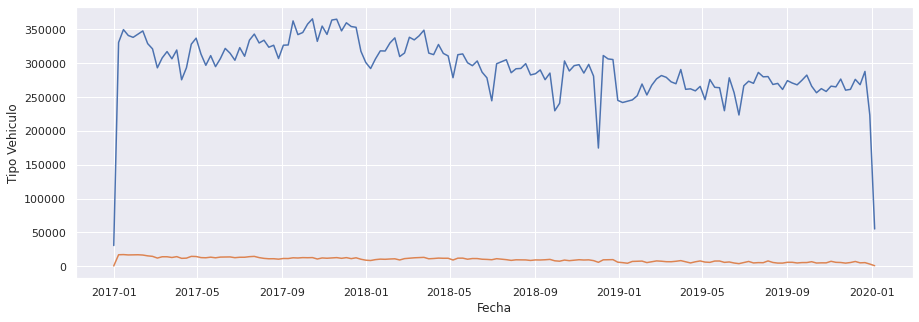

In [78]:
plt.figure(figsize=(15,5))
plt.plot(Tipveh_st_w.index, Tipveh_st_w.liviano, label = 'Liviano')
plt.plot(Tipveh_st_w.index, Tipveh_st_w.pesado, label = 'Pesado')
plt.ylabel('Tipo Vehiculo')
plt.xlabel('Fecha')
plt.show();

 #### <font color=blue> **c. Serie de tiempo ' EDA ' Frecuencia Diaria** 


In [79]:
filtered_Ilia_efectivo_st

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
1750,2017,2017-01-01,0,1,Domingo,Illia,Centro,Liviano,EFECTIVO,1
1755,2017,2017-01-01,1,2,Domingo,Illia,Centro,Liviano,EFECTIVO,10
1757,2017,2017-01-01,1,2,Domingo,Illia,Centro,Liviano,EFECTIVO,783
1761,2017,2017-01-01,1,2,Domingo,Illia,Centro,Pesado,EFECTIVO,3
1764,2017,2017-01-01,2,3,Domingo,Illia,Centro,Liviano,EFECTIVO,14
...,...,...,...,...,...,...,...,...,...,...
812010,2019,2019-12-31,21,22,Martes,Illia,Provincia,Liviano,EFECTIVO,556
812016,2019,2019-12-31,21,22,Martes,Illia,Provincia,Pesado,EFECTIVO,1
812080,2019,2019-12-31,22,23,Martes,Illia,Centro,Liviano,EFECTIVO,214
812085,2019,2019-12-31,22,23,Martes,Illia,Provincia,Liviano,EFECTIVO,190


<font color=blue> * Resampleo  datos para agrupar por dìa

In [80]:
filtered_Ilia_diaria = filtered_Ilia_efectivo_st.resample('D', on = 'fecha').sum()
print(filtered_Ilia_diaria.shape)
filtered_Ilia_diaria.drop(columns=['periodo','hora_inicio','hora_fin'], inplace = True)
filtered_Ilia_diaria

(1095, 4)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


<font color=blue> * Cantidad de Vehículos por día Autopista Illia - Para Medio de Pago en Efectivo (con resampleo diario)

In [81]:
dataset_st_diario = px.line(title='Cantidad de Vehículos por día Autopista Illia - Para Medio de Pago en Efectivo con resampleo diario')
dataset_st_diario.add_scatter(y=filtered_Ilia_diaria['cantidad_pasos'], mode='lines', name="Pasos")
dataset_st_diario.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
dataset_st_diario.update_layout(
    width=1000,
    height=500,)
dataset_st_diario.show()

<font color=blue> * Organizar la data y ver los primeras 10 instancias --> **mayor flujo diario con pago en efectivopara el 2017-12-07**

In [82]:
top10xDia = filtered_Ilia_diaria.sort_values('cantidad_pasos', ascending=False)
top10xDia.head(10)

,cantidad_pasos
fecha,
2017-12-07,63127
2017-11-24,61594
2017-10-13,61421
2017-11-10,61382
2017-11-17,61259
2017-10-06,61099
2017-12-01,60985
2017-12-15,60280
2017-01-13,59651


 #### <font color=blue> * **Valores Faltantes Frecuencia Diaria** --><font color=green> No se encuentran valores nulos

In [83]:
filtered_Ilia_diaria.isna().sum()

cantidad_pasos    0
dtype: int64

 #### <font color=blue> * **Valores Atipicos Frecuencia Diaria** -->

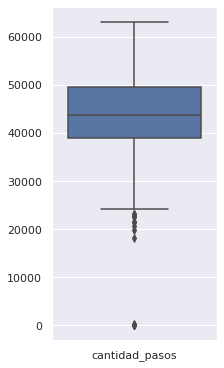

In [84]:
fig,(ax1) = plt.subplots(1,constrained_layout=True,figsize=(3,5))

sns.boxplot(data=filtered_Ilia_diaria,ax=ax1)

<font color=blue> *** Outliers Frecuencia diaria**

In [85]:
q25,q75 = np.percentile(filtered_Ilia_diaria.cantidad_pasos, [25,75])
iqr = q75 - q25
minimo_d = q25 - 1.5*iqr
maximo_d = q75 + 1.5*iqr
print('**Outliers Frecuencia diaria**')
print('q25 =',q25)
print ('q75=',q75)
print( 'iqr=',iqr)
print( 'minimo_d=', minimo_d) 
print( 'maximo_d=', maximo_d)

**Outliers Frecuencia diaria**
q25 = 39061.5
q75= 49498.0
iqr= 10436.5
minimo_d= 23406.75
maximo_d= 65152.75


In [86]:
result =filtered_Ilia_diaria.cantidad_pasos < minimo_d
print(result.value_counts())

False    1079
True       16
Name: cantidad_pasos, dtype: int64


In [87]:
result =filtered_Ilia_diaria.cantidad_pasos > maximo_d
print(result.value_counts())

False    1095
Name: cantidad_pasos, dtype: int64


In [88]:
mascara_outliers_d = (filtered_Ilia_diaria.cantidad_pasos  < minimo_d) | (filtered_Ilia_diaria.cantidad_pasos  > maximo_d)
mascara_outliers_d.sum()

16

<font color=green> **Para frecuencia diaria tenemos  16  outliers en rango minimo_d= 23406.75 y maximo_d= 65152.75**

In [89]:
filtered_Ilia_diaria.cantidad_pasos[mascara_outliers_d]

fecha
2017-04-06       40
2017-12-31    23229
2018-06-25        0
2018-09-25        0
2018-11-29    19728
2018-11-30        0
2018-12-01      350
2018-12-30    21559
2018-12-31    22599
2019-01-13    18076
2019-01-19    22774
2019-05-29        0
2019-06-16    23190
2019-06-17    21469
2019-12-01    20553
2019-12-31    21447
Name: cantidad_pasos, dtype: int64

 #### <font color=blue> **d. Serie de tiempo ' EDA ' Frecuencia Semanal:**

<font color=blue> * Resampleo  datos para agrupar por semana

In [90]:
filtered_Ilia_semanal = filtered_Ilia_efectivo_st.resample('W', on = 'fecha').sum()
print(filtered_Ilia_semanal.shape)
filtered_Ilia_semanal.drop(columns=['periodo','hora_inicio','hora_fin'], inplace = True)
filtered_Ilia_semanal


(158, 4)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
...,...
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881


<font color=blue> * Cantidad de Vehículos por semana el la Autopista Illia - Para Medio de Pago en Efectivo (con resampleo semanal)


In [91]:
dataset_st_semanal = px.line(title='Cantidad de Vehículos por semana Autopista Illia - Para Medio de Pago en Efectivo con resampleo semanal')
dataset_st_semanal.add_scatter(y=filtered_Ilia_semanal['cantidad_pasos'], mode='lines', name="Pasos")
dataset_st_semanal.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
dataset_st_semanal.update_layout(
    width=1000,
    height=500,)
dataset_st_semanal.show()

<font color=blue> * Organizar la data y ver los primeras 10 instancias --> **mayor flujo semanal con pago en efectivo para la semana del 2017-10-15**

In [92]:
top10xSemana = filtered_Ilia_semanal.sort_values('cantidad_pasos', ascending=False)
top10xSemana.head(10)

,cantidad_pasos
fecha,
2017-10-15,377832
2017-11-19,377263
2017-11-12,375644
2017-09-17,374520
2017-12-03,371970
2017-10-08,369918
2017-10-29,366650
2017-01-15,366413
2017-12-17,365063


 #### <font color=blue> * **Valores Faltantes Frecuencia Semanal** --><font color=green> No se encuentran valores nulos

In [93]:
 filtered_Ilia_semanal.isna().sum()

cantidad_pasos    0
dtype: int64

  #### <font color=blue>* **Valores Atipicos Frecuencia Semanal** -->

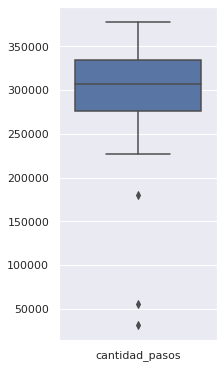

In [94]:
 fig,(ax1) = plt.subplots(1,constrained_layout=True,figsize=(3,5))

sns.boxplot(data=filtered_Ilia_semanal,ax=ax1)


<font color=blue> *** Outliers Frecuencia Semanal**

In [95]:
q25,q75 = np.percentile(filtered_Ilia_semanal.cantidad_pasos, [25,75])
iqr = q75 - q25
minimo_s = q25 - 1.5*iqr
maximo_s = q75 + 1.5*iqr
print('**Outliers Frecuencia diaria**')
print('q25 =',q25)
print ('q75=',q75)
print( 'iqr=',iqr)
print( 'minimo_s=', minimo_s) 
print( 'maximo_s=', maximo_s)

**Outliers Frecuencia diaria**
q25 = 276345.25
q75= 334921.5
iqr= 58576.25
minimo_s= 188480.875
maximo_s= 422785.875


In [96]:
result =filtered_Ilia_semanal.cantidad_pasos < minimo_s
print(result.value_counts())

False    155
True       3
Name: cantidad_pasos, dtype: int64


In [97]:
result =filtered_Ilia_semanal.cantidad_pasos > maximo_s
print(result.value_counts())

False    158
Name: cantidad_pasos, dtype: int64


In [98]:
mascara_outliers_s = (filtered_Ilia_semanal.cantidad_pasos  < minimo_s) | (filtered_Ilia_semanal.cantidad_pasos  > maximo_s)
mascara_outliers_s.sum()

3

<font color=green> **Para frecuencia semanal tenemos  3  outliers en rango minimo_s= 188480.875 y maximo_s= 422785.875**

In [99]:
filtered_Ilia_semanal.cantidad_pasos[mascara_outliers_s]

fecha
2017-01-01     31183
2018-12-02    180328
2020-01-05     55970
Name: cantidad_pasos, dtype: int64

 #### <font color=blue> **e. Serie de tiempo ' EDA ' Frecuencia Mensual:**

<font color=blue> * Resampleo  datos para agrupar por mes

In [100]:
filtered_Ilia_mensual = filtered_Ilia_efectivo_st.resample('M', on = 'fecha').sum()
print(filtered_Ilia_mensual.shape)
filtered_Ilia_mensual.drop(columns=['periodo','hora_inicio','hora_fin'], inplace = True)
filtered_Ilia_mensual


(36, 4)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136
2017-06-30,1408464
2017-07-31,1502820
2017-08-31,1492232
2017-09-30,1519327


<font color=blue> * Cantidad de Vehículos por mes el la Autopista Illia - Para Medio de Pago en Efectivo (con resampleo mensual)

In [101]:
dataset_st_mensual = px.line(title='Cantidad de Vehículos por mes Autopista Illia - Para Medio de Pago en Efectivo con resampleo mes')
dataset_st_mensual.add_scatter(y=filtered_Ilia_mensual['cantidad_pasos'], mode='lines', name="Pasos")
dataset_st_mensual.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
dataset_st_mensual.update_layout(
    width=1000,
    height=500,)
dataset_st_mensual.show()


<font color=blue> * Organizar la data y ver los primeras 10 instancias --> **mayor flujo mensual con pago en efectivo pra los meses del 2017**

In [102]:
top10xMes = filtered_Ilia_mensual.sort_values('cantidad_pasos', ascending=False)
top10xMes.head(10)


,cantidad_pasos
fecha,
2017-10-31,1597356
2017-11-30,1581428
2017-01-31,1565260
2018-03-31,1540839
2017-12-31,1521177
2017-09-30,1519327
2017-07-31,1502820
2017-08-31,1492232
2017-03-31,1451214


 #### <font color=blue>* **Valores Faltantes Frecuencia Mensual** --><font color=green> No se encuentran valores nulos

In [103]:
 filtered_Ilia_mensual.isna().sum()

cantidad_pasos    0
dtype: int64

  #### <font color=blue> * **Valores Atipicos Frecuencia Mensual** -->

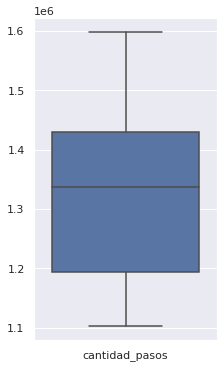

In [104]:
 fig,(ax1) = plt.subplots(1,constrained_layout=True,figsize=(3,5))

sns.boxplot(data=filtered_Ilia_mensual,ax=ax1)

<font color=blue> *** Outliers Frecuencia mensual**

In [105]:
q25,q75 = np.percentile(filtered_Ilia_mensual.cantidad_pasos, [25,75])
iqr = q75 - q25
minimo_m = q25 - 1.5*iqr
maximo_m = q75 + 1.5*iqr
print('**Outliers Frecuencia mensual**')
print('q25 =',q25)
print ('q75=',q75)
print( 'iqr=',iqr)
print( 'minimo_m=', minimo_m) 
print( 'maximo_m=', maximo_m)

**Outliers Frecuencia mensual**
q25 = 1193707.5
q75= 1429053.75
iqr= 235346.25
minimo_m= 840688.125
maximo_m= 1782073.125


In [106]:
result =filtered_Ilia_mensual.cantidad_pasos < minimo_m
print(result.value_counts())

False    36
Name: cantidad_pasos, dtype: int64


In [107]:
result =filtered_Ilia_mensual.cantidad_pasos > maximo_m
print(result.value_counts())

False    36
Name: cantidad_pasos, dtype: int64


In [108]:
mascara_outliers_m = (filtered_Ilia_mensual.cantidad_pasos  < minimo_m) | (filtered_Ilia_mensual.cantidad_pasos  > maximo_m)
mascara_outliers_m.sum()

0

<font color=green> **Para frecuencia mensual tenemos  0  outliers en rango minimo_m= 840688.125 y maximo_m= 1782073.125**


  #### <font color=green> ***Conclusiones de la exploración de datos (EDA) para la data filtrada por pago en efectivo en la autopista Illia:***






<font color=green>- La forma de pago EFECTIVO fue disminuyendo su uso de un año a otro y en cambio la forma de pago TELEPASE fue aumentando de un año a otro.

<font color=green>- TELEPASE y EFECTIVO, son las formas de pagos mas usadas en las distintas autopistas.

<font color=green>- Las horas de mayor flujo vehicular son las 18:00 y las 19:00. 

<font color=green>- Las horas de menor flujo son las 4:00 a.m.

<font color=green>- El DIA DE LA SEMANA con mayor flujo vehicular es el VIERNES, seguido del JUEVES.

<font color=green>- El  DIA DE LA SEMANA con menor flujo vehicular es el DOMINGO.

<font color=green>- El MES DEL AÑO con mayor flujo vehicular es MARZO. 

<font color=green>- EL MES DEL AÑO con menor flujo vehicular es JUNIO

<font color=green>- En la autopista Illia circulan 97% de vehículos livianos y solo 3% son vehículos pesados.

<font color=green>- El año 2017 es el que presenta MAYOR flujo vehicular con pagos en EFECTIVO 

<font color=green>- El año 2019 es el que presenta MENOR flujo vehicular con pagos en EFECTIVO 

<font color=green>- La forma de pago EFECTIVO es  cada vez menos usando.

<font color=green>- Se registran 1,5 millon de pasos en sentido (Centro) hacia la capital que saliendo de esta sentido (Provincia). 

<font color=green>- Se  registran 44 millones de pasos de vehículos livianos vs los vehículos pesados. 

<font color=green>- El trafico vehicular se ve AFECTADO por las HORAS PICO (hora de entrada y salida de los trabajos).

#### <font color=blue> **3.2 Autocorrelación**

<font color=blue>Como ya hemos visto, la correlación es una cuantificación de la relación entre el comportamiento de dos variables. En un lenguaje coloquial:

<font color=blue>1. Cuando ambas crecen y decrecen a la vez, decimos que están positivamente correlacionadas (valor cercano a 1).

<font color=blue> 2. Si una decrece y la otra crece, y viceversa, están negativamente correlacionadas (valor cercano a -1).

<font color=blue> 3. Y si no parece haber una relación entre su comportamiento, no están correlacionadas (valor alrededor de 0).

<font color=blue>Vimos que hay más de una forma de calcular la correlación, la más conocida la correlación de Pearson o lineal.

<font color=blue>En series de tiempo, el concepto de correlación aplica perfectamente. Dos series de tiempo están correlacionadas si su comportamiento en el tiempo es parecido (crecen y decrecen juntas) o anti-correlacionadas si una es máxima cuando la otra es mínima, y viceversa. 

<font color=blue>También existe el concepto de autocorrelación, que es - a grosso modo - la correlación de una serie consigo misma. Pero toda variable correlacionada consigo misma da 1, por lo que estaría faltando algo. Lo que falta son los **lags**. 

<font color=blue>**Vamos a calcular la correlación con la serie de tiempo original y la misma serie desfasada o corrida en el tiempo.** 

<font color=blue>En la librería `statsmodel` esto lo logramos con la función `acf`. Como siempre, te recomendamos leer la documentación y ver bien los argumentos de esta función.

<font color=blue> * **Cantidad de semanas que estamos observando**

In [110]:
nlags =filtered_Ilia_semanal.shape[0]
nlags

158

<font color=blue> * **Calcular autocorrelación**

In [111]:
autocorr = acf(filtered_Ilia_semanal.cantidad_pasos, nlags = nlags)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [112]:
autocorr.shape

(158,)

<font color=blue> * **Graficar correlación**

Text(0.5, 0, 'lag')

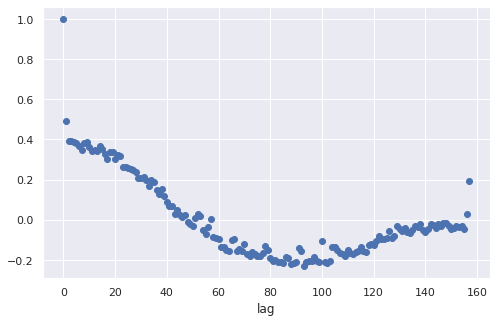

In [113]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags), autocorr)
plt.xlabel('lag')

<Figure size 1440x720 with 0 Axes>

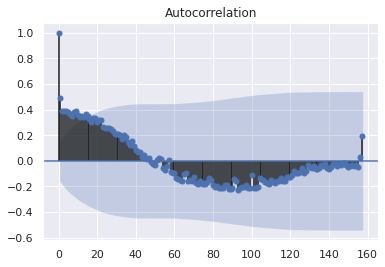

In [137]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (20,10))
plot_acf(filtered_Ilia_semanal.cantidad_pasos, lags= nlags-1)
plt.show()

<font color=blue> **Se eligió usar los 158 datos de la serie para hallar la autocorrelación,  se encontró que el valor óptimo para el loop_back es 16**

<font color=blue>  **Por tanto nuestra matriz de datos quedara con 16 columnas.**

# <font color=blue> **Parte B - Modelo de Machine Learning**

#### <font color=blue> **1. Predicción a Futuro**
<font color=green>**Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.**

<font color=blue>**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

#### <font color=blue>**1.** Filtro por estaciòn Ilia y forma de pago igual a efectivo.

In [138]:
dataset_flujovehicular= pd.concat([dataset_trimestres_2017, dataset_trimestres_2018, dataset_trimestres_2019])
dataset_flujovehicular



,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,trimestre
1750,2017,2017-01-01,0,1,Domingo,Illia,Centro,Liviano,EFECTIVO,1,PRIMERO
1755,2017,2017-01-01,1,2,Domingo,Illia,Centro,Liviano,EFECTIVO,10,PRIMERO
1757,2017,2017-01-01,1,2,Domingo,Illia,Centro,Liviano,EFECTIVO,783,PRIMERO
1761,2017,2017-01-01,1,2,Domingo,Illia,Centro,Pesado,EFECTIVO,3,PRIMERO
1764,2017,2017-01-01,2,3,Domingo,Illia,Centro,Liviano,EFECTIVO,14,PRIMERO
...,...,...,...,...,...,...,...,...,...,...,...
812010,2019,2019-12-31,21,22,Martes,Illia,Provincia,Liviano,EFECTIVO,556,CUARTO
812016,2019,2019-12-31,21,22,Martes,Illia,Provincia,Pesado,EFECTIVO,1,CUARTO
812080,2019,2019-12-31,22,23,Martes,Illia,Centro,Liviano,EFECTIVO,214,CUARTO
812085,2019,2019-12-31,22,23,Martes,Illia,Provincia,Liviano,EFECTIVO,190,CUARTO


In [139]:
trimestres= dataset_flujovehicular.groupby(['periodo','trimestre']).cantidad_pasos.sum()

trimestres

periodo  trimestre
2017     CUARTO       4699961
         PRIMERO      4379587
         SEGUNDO      4189585
         TERCERO      4514379
2018     CUARTO       3763829
         PRIMERO      4301592
         SEGUNDO      4028778
         TERCERO      3872745
2019     CUARTO       3513852
         PRIMERO      3505635
         SEGUNDO      3429323
         TERCERO      3666315
Name: cantidad_pasos, dtype: int64

Text(0.5, 1.0, 'Distribucion por cantidad de vehiculos/pago effectivo ')

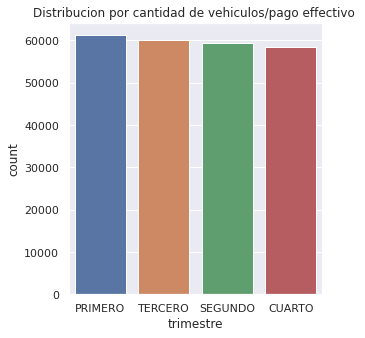

In [140]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.countplot(data=dataset_flujovehicular,x="trimestre",order=dataset_flujovehicular["trimestre"].value_counts().index)
plt.title("Distribucion por cantidad de vehiculos/pago effectivo ")

<font color=blue> *** Reesample semana**

In [141]:
dataset_flujovehicular['fecha'] = pd.to_datetime(dataset_flujovehicular['fecha'])

In [142]:
dataset_Ilia_semanal = dataset_flujovehicular.resample('W', on = 'fecha').sum()
print(dataset_Ilia_semanal.shape)
dataset_Ilia_semanal.drop(columns=['periodo','hora_inicio','hora_fin'], inplace = True)
dataset_Ilia_semanal

(158, 4)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
...,...
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881


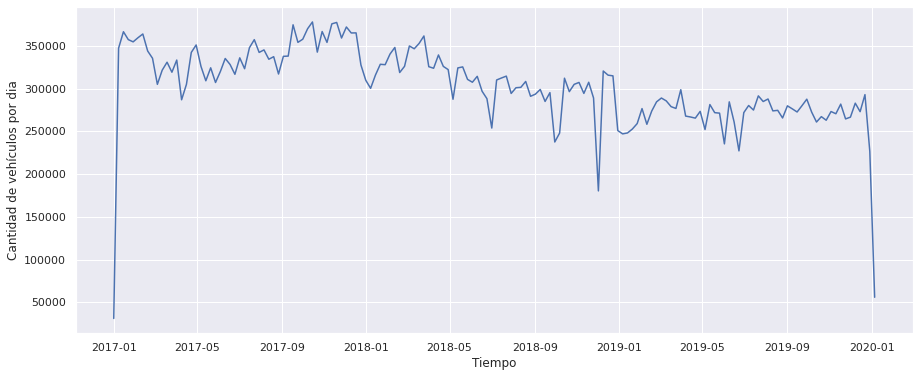

In [143]:
plt.figure(figsize = (15,6))
plt.plot(dataset_Ilia_semanal.index, dataset_Ilia_semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por dia')
plt.show()

<font color=blue> *** Outliers Frecuencia semanal**

In [124]:
q25,q75 = np.percentile(dataset_Ilia_semanal.cantidad_pasos, [25,75])
iqr = q75 - q25
minimo_m = q25 - 1.5*iqr
maximo_m = q75 + 1.5*iqr
print('**Outliers Frecuencia semanal**')
print('q25 =',q25)
print ('q75=',q75)
print( 'iqr=',iqr)
print( 'minimo_m=', minimo_m) 
print( 'maximo_m=', maximo_m)

**Outliers Frecuencia semanal**
q25 = 276345.25
q75= 334921.5
iqr= 58576.25
minimo_m= 188480.875
maximo_m= 422785.875


<font color=blue> *** Graficamos**

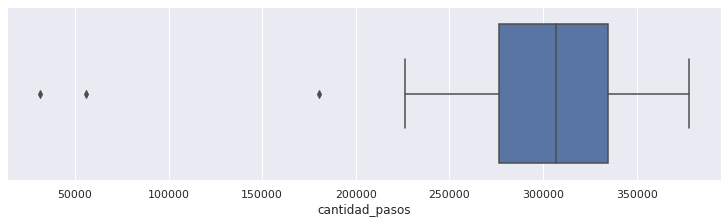

In [125]:
fig,(ax1) = plt.subplots(1,constrained_layout=True,figsize=(10,3))

sns.boxplot(data=dataset_Ilia_semanal,x="cantidad_pasos",ax=ax1)

In [126]:
result =dataset_Ilia_semanal.cantidad_pasos < minimo_m
print(result.value_counts())

False    155
True       3
Name: cantidad_pasos, dtype: int64


In [127]:
result =dataset_Ilia_semanal.cantidad_pasos > maximo_m
print(result.value_counts())

False    158
Name: cantidad_pasos, dtype: int64


In [128]:
mascara_outliers_m = (dataset_Ilia_semanal.cantidad_pasos  < minimo_m) | (dataset_Ilia_semanal.cantidad_pasos  > maximo_m)
mascara_outliers_m.sum()

3

In [129]:
dataset_Ilia_semanal.cantidad_pasos[mascara_outliers_m]

fecha
2017-01-01     31183
2018-12-02    180328
2020-01-05     55970
Name: cantidad_pasos, dtype: int64

In [130]:
dataset_Ilia_semanal.shape

(158, 1)

<font color=blue> *** Definimos nuevo dataset con los minimos y maximos calculados**

In [131]:
#Nueva base de datos sin los outli
data_Ilia= dataset_Ilia_semanal[(dataset_Ilia_semanal.cantidad_pasos > minimo_m) &(dataset_Ilia_semanal.cantidad_pasos < maximo_m) ]
data_Ilia

,cantidad_pasos
fecha,
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
2017-02-05,359401
...,...
2019-12-01,266555
2019-12-08,282891
2019-12-15,272960


In [132]:
data_Ilia.describe()

,cantidad_pasos
count,155.000
mean,307084.516
std,35978.811
min,226390.000
25%,277774.000
50%,307352.000
75%,335271.000
max,377832.000


####<font color=blue>**2.** Elegir una métrica apropiada para evaluar los resultados de los modelos.

<font color=green> Para nuestro proyecto tenemos un problema de regresión, en el cual partimos del error entre la etiqueta **y** y la predicción del modelo **y'**, r = y - y'. **Éste es el error por instancia.** En algunos casos, nuestro regresor sobreestimará el valor de la predicción, por lo que el error será positivo, mientras que en otros casos subestimará, por lo que el error será negativo. El error de nuestro regresor estará relacionado con la suma de los errores sobre todas las instancias. Para corregir usremos las metricas vistas:

<font color=green>**1. Mean Absolute Error, MAE**: es sumar los valores absolutos de los errores sobre cada instancia y luego promediar para obtener el error promedio. Tomar el valor absoluto del error 

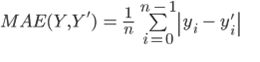:


<font color=green>**2. Mean Squared Error, MSE**: en lugar de tomar el valor absoluto, es tomar el cuadrado del error. El MSE tiene una pequeña desventaja, que es que al estar el error elevado al cuadrado, no tiene la misma magnitud ni unidades que la variable y.

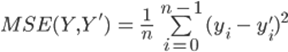

<font color=green>**3. Root Mean Squared Error, RMSE**:utilizar la raíz del error cuadrado promedio

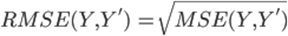



> <font color=green> Tener en cuanta que: 

> <font color=green>**1. En general, MSE y RMSE son más sensibles a valores atípicos** 

> <font color=green>**2. Estas métricas son métricas de error; es decir, a más bajo MAE, MSE o RMSE, mejor regresor** 


####<font color=blue> **3. Definir X e Y**


<font color=blue> **a.**  Predecir el siguiente valor en la serie de tiempo semanal de trafico vehicular.

In [133]:
senial = data_Ilia.cantidad_pasos
senial.count()

155

<font color=blue> **b.** En primer lugar, debemos definir cuántos valores hacia atrás tomaremos.

In [134]:
look_back = 12 # Numero de semanas anteriores para predecir el valor siguiente.
look_back

12

<font color=blue> **c.** Creamos los X e y con ceros para luego llenar con los datos. Notar los shape

In [135]:
N = senial.shape[0]
X = np.zeros((N - look_back -1,look_back))
y = np.zeros(N - look_back -1)
print(X.shape, y.shape)

(142, 12) (142,)


<font color=blue> **d.** Llenamos los X e y


In [144]:
for i in range(X.shape[0]):

    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [145]:
print('Tamaño de X')
print(X.shape)



Tamaño de X
(142, 12)


In [146]:
print('Tamaño de y')
print(y.shape)


Tamaño de y
(142,)


<font color=blue> **e.** Hacemos el train/test split. 

In [147]:

N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_train = (N - (N_test +1))- look_back# cantidad de instancias que vamos a usar para entrenar. 

N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(130, 12) (130,)
(12, 12) (12,)


####<font color=blue> **4. Definir Modelo Benchmark: DecisionTreeRegressor** 

In [148]:
tree_benchmark = DecisionTreeRegressor(max_depth = 10, random_state = 42)


<font color=blue> **a. Optimizar parametros**

In [149]:
param_grid = {'max_depth':np.arange(10, 20,1),
              'min_samples_split':[2,4,6,8,10], 
              'max_features': ['auto','sqrt', 'log2']}

model_tree = GridSearchCV(tree_benchmark, param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv=5)


<font color=blue> **b. Entrenamos el modelo con el set de entrenamiento**

In [150]:

# Entrenamos con la grilla definida y un CV con tamaño de Fold=5

model_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='neg_root_mean_squared_error')

 <font color=blue> **c. Mejores parametros y score para entrenamiento**

In [151]:
print("Mejores parametros: "+str(model_tree.best_params_))
print("Mejor Score: "+str(model_tree.best_score_)+'\n')
resultados = pd.DataFrame(model_tree.cv_results_)
resultados
score = int(model_tree.best_score_)
score

Mejores parametros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10}
Mejor Score: -26588.5334133866



-26588

 <font color=blue> **d. Convertimos el score a RMSE** para entrenamiento

In [152]:
RMSE= np.round(np.sqrt(-score), 2)
RMSE

163.06

 <font color=blue> **e. Ahora colocamos los hiperparametros optimizados dentro de nuestro arbol de decision benchmark**

In [153]:
tree_benchmark_best = DecisionTreeRegressor(max_depth = 10,max_features = 'auto',
                                   min_samples_split = 10,  random_state = 42)

tree_benchmark_best.fit(X_train, y_train)
y_train_pred_bench = tree_benchmark_best.predict(X_train)
y_test_pred_bench = tree_benchmark_best.predict(X_test)



 <font color=blue> **Calculamos el error**

In [154]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_bench))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_bench))
print(f'Error en Train para el Benchmark: {rmse_train}')
print(f'Error en Test para el Benchmark: {rmse_test}')

Error en Train para el Benchmark: 9637.630966415963
Error en Test para el Benchmark: 15798.000409057577


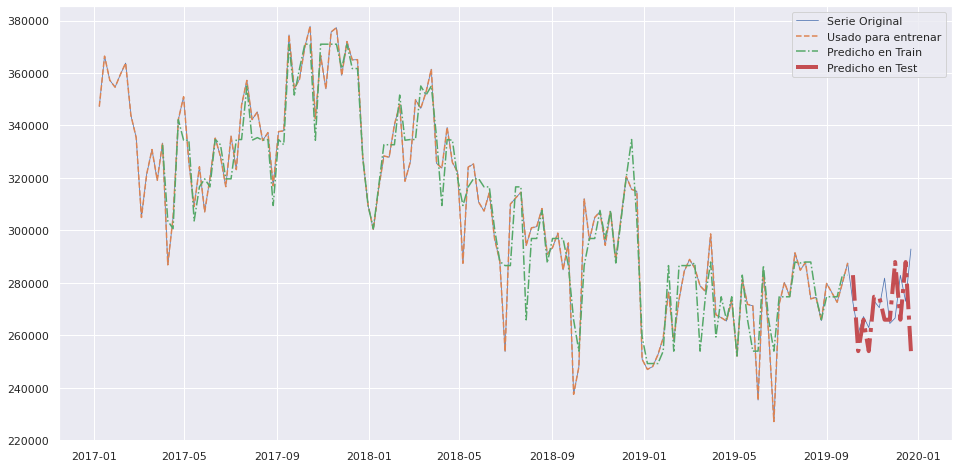

In [155]:
plt.figure(figsize=(16,8))
plt.plot(data_Ilia.index[:length_total], data_Ilia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(data_Ilia.index[:N_train + look_back], data_Ilia[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(data_Ilia.index[look_back: look_back + N_train], y_train_pred_bench,'-.',label = 'Predicho en Train')
plt.plot(data_Ilia.index[N_train+look_back: length_total], y_test_pred_bench,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()

plt.show()

 <font color=blue> Podemos observar como nuestro arbol de decision regresor benchmark tiende a manifestar un menor error en el train y una mayor en el test prácticamente el doble, lo que indica que no lo está haciendo muy bien. En la gráfica se ve que no sigue la tendencia en la predicción de las semanas que queremos predecir.
 
 <font color=blue> Tambien podemos apreciar la forma escalonada de la estimacion en la prediccion tanto en train como en test, producto de la mecanica del funcionamiento algoritmico propio de los arboles de decision.

####<font color=blue> **5.  Modelo: RandomForestRegressor** 

In [156]:
model_rf =RandomForestRegressor(max_depth = 10, random_state = 42)

<font color=blue> **a. Optimizar parametros**

In [157]:
grid_1 = {
    'n_estimators':[50,75,100,150,200,300],
    'max_depth':np.arange(1,20)
}
model_rf = GridSearchCV(model_rf, param_grid=grid_1, scoring='neg_mean_squared_error')



<font color=blue> **b. Entrenamos el modelo con el set de entrenamiento** --> ejecuciín 4 minutos

In [158]:

model_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=10, random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': [50, 75, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error')

 <font color=blue> **c. Mejores parametros y score para entrenamiento**

In [159]:
print("Mejores parametros: "+str(model_rf.best_params_))
print("Mejor Score: "+str(model_rf.best_score_)+'\n')
resultados = pd.DataFrame(model_rf.cv_results_)
resultados
score = int(model_rf.best_score_)
score

Mejores parametros: {'max_depth': 3, 'n_estimators': 300}
Mejor Score: -482352477.4536128



-482352477

 <font color=blue> **d. Convertimos el score a RMSE** para entrenamiento

In [160]:
RMSE= np.round(np.sqrt(-score), 2)
RMSE

21962.52

 <font color=blue> **e. Ahora colocamos los hiperparametros optimizados dentro de nuestro arbol de decision benchmark**

In [161]:
model_rf_best = RandomForestRegressor(n_estimators=100 ,max_depth =5, n_jobs =-1,random_state=42).fit(X_train,y_train)

y_pred = model_rf_best.predict(X)
y_train_pred = model_rf_best.predict(X_train)
y_test_pred = model_rf_best.predict(X_test)


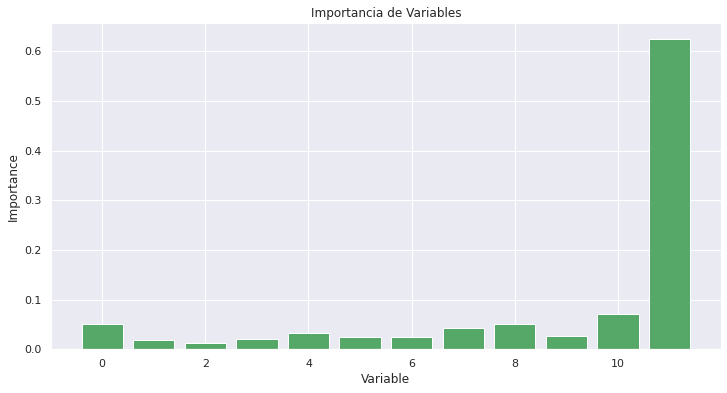

In [162]:
plt.figure(figsize = (12,6))
plt.bar(np.arange(model_rf_best.feature_importances_.size),model_rf_best.feature_importances_, color='g')
plt.title('Importancia de Variables')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.show();

 <font color=blue> Si observamos la importancia de las características que devuelve el modelo, vemos que de las 12 semanas usadas para predecir, la úlima es las mas relevante, y la penúltima la siguiente más relevante.



 <font color=blue> **Calculamos el error**

In [163]:
MSE_rf_train= mean_squared_error(y_train, y_train_pred)
RMSE_rf_train = np.sqrt(MSE_rf_train)
print('Error en Train para el RandomForest:',RMSE_rf_train)

MSE_rf_test = mean_squared_error(y_test, y_test_pred)
RMSE_rf_test = np.sqrt(MSE_rf_test)
print('Error en Test RandomForest:',RMSE_rf_test)

Error en Train para el RandomForest: 9774.892895700288
Error en Test RandomForest: 10598.570025060068


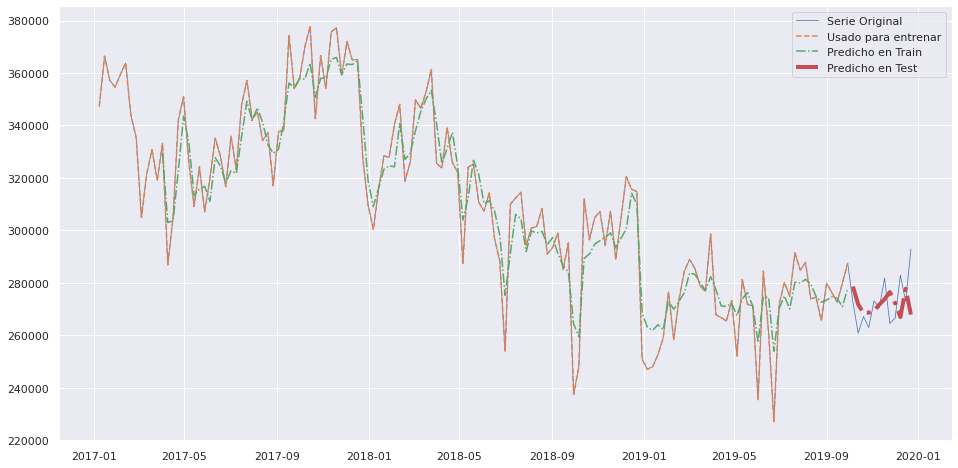

In [164]:
plt.figure(figsize=(16,8))
plt.plot(data_Ilia.index[:length_total], data_Ilia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(data_Ilia.index[:N_train + look_back], data_Ilia[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(data_Ilia.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(data_Ilia.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()

plt.show()

 <font color=blue> **Conclusión RandomForest**: 

<font color=blue> * Se puede deducir que hay un buen acomodamiento entre el predicho en Train y el Usado para entrenar a partir de mayo del 2017. Hay una leve diferencia en el periodo 2019-01.

<font color=blue> * Se ve que los datos usados para entrenar y usados para entrenar y el predicho en el train se ciñen a la serie original, algo diferente y no tan bueno pasa con la predicción.

<font color=blue> * Se podría decir que aunque al parecer hay un posible overfitting en el usado para entrenar y el predicho en train, al final el predicho en Test no está haciéndolo del todo bien.

<font color=green> **HAY UNA MEJORA IMPORTANTE EN EL MODELO, COMPARADO CON EL BENCHMARK: presentando mejor desempeño** 


<font color=green> * aunque en el ultimo trimestre del 2019 que es la prediccón , no obtiene tan buen rendimiento


####<font color=blue> **6.   Utiliza el modelo creado para predecir el tráfico en el año 2020.**

<font color=blue> Para realizar la predicción del año 2020, utilizaré el modelo  RandomForest optimizado, trabajado anteriormente.

<font color=blue> Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction, se realizará la predicción de las 52 semanas del 2020.


####<font color=blue>**a. Preparacion de datos:** Adiciono data del **2020**

In [165]:
data_FlujoVehicular_2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2020.csv")
data_FlujoVehicular_2020

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.000,2020-01-01 00:00:00,enero,Miércoles,1.000,0.000,1.000,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.000
1,2020.000,2020-01-01 00:00:00,enero,Miércoles,1.000,0.000,1.000,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.000
2,2020.000,2020-01-01 00:00:00,enero,Miércoles,1.000,0.000,1.000,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.000
3,2020.000,2020-01-01 00:00:00,enero,Miércoles,1.000,0.000,1.000,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.000
4,2020.000,2020-01-01 00:00:00,enero,Miércoles,1.000,0.000,1.000,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533738,2020.000,2020-12-31,diciembre,Jueves,31.000,21.000,22.000,DELLEPIANE LINIERSLEPIANE CENTRO,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Centro,1.000
2533739,2020.000,2020-12-31,diciembre,Jueves,31.000,21.000,22.000,DELLEPIANE LINIERS,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,1.000
2533740,2020.000,2020-12-31,diciembre,Jueves,31.000,21.000,22.000,ILP,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,1.000
2533741,2020.000,2020-12-31,diciembre,Jueves,31.000,22.000,23.000,ILP,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,2.000


<font color=blue> **Uno datasets del  2017,2018,2019y 2020, Filtro por estación ILLIA y foema de pago EFECTIVO**  

In [166]:
# concateno los dataset
dataset_flujovehicular_x1= pd.concat([data_FlujoVehicular_2017, data_FlujoVehicular_2018, data_FlujoVehicular_2019,data_FlujoVehicular_2020])
# Filtro por estaciòn Ilia y forma de pago igual a efectivo
filtered_Ilia_efectivo_x1=dataset_flujovehicular_x1.query("(estacion == 'ILLIA' or estacion == 'Illia'  ) and (forma_pago =='Efectivo' or forma_pago =='EFECTIVO')")

filtered_Ilia_efectivo_x1['fecha'] = pd.to_datetime(filtered_Ilia_efectivo_x1['fecha'])
filtered_Ilia_efectivo_x1


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes,dia_fecha,observacion
1750,2017.000,2017-01-01,0.000,1.000,Domingo,Illia,Centro,Liviano,EFECTIVO,1.000,NaN,nan,NaN
1755,2017.000,2017-01-01,1.000,2.000,Domingo,Illia,Centro,Liviano,EFECTIVO,10.000,NaN,nan,NaN
1757,2017.000,2017-01-01,1.000,2.000,Domingo,Illia,Centro,Liviano,EFECTIVO,783.000,NaN,nan,NaN
1761,2017.000,2017-01-01,1.000,2.000,Domingo,Illia,Centro,Pesado,EFECTIVO,3.000,NaN,nan,NaN
1764,2017.000,2017-01-01,2.000,3.000,Domingo,Illia,Centro,Liviano,EFECTIVO,14.000,NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532216,2020.000,2020-12-24,11.000,12.000,Jueves,ILLIA,Provincia,Pesados 6 Ejes,Efectivo,1.000,diciembre,24.000,Efectivo
2532227,2020.000,2020-12-24,12.000,13.000,Jueves,ILLIA,Provincia,Pesados 6 Ejes,Efectivo,1.000,diciembre,24.000,Efectivo
2532271,2020.000,2020-12-24,17.000,18.000,Jueves,ILLIA,Centro,Pesados 6 Ejes,Efectivo,1.000,diciembre,24.000,Efectivo
2532928,2020.000,2020-12-28,12.000,13.000,Lunes,ILLIA,Provincia,Pesados 6 Ejes,Efectivo,1.000,diciembre,28.000,Efectivo


<font color=blue> **Reesample semanal**  

In [167]:
dataset_Ilia_semanal_x1 = filtered_Ilia_efectivo_x1.resample('W', on = 'fecha').sum()
print(dataset_Ilia_semanal_x1.shape)
dataset_Ilia_semanal_x1.drop(columns=['periodo','hora_inicio','hora_fin', 'dia_fecha'], inplace = True)
dataset_Ilia_semanal_x1

(210, 5)


,cantidad_pasos
fecha,
2017-01-01,31183.000
2017-01-08,347212.000
2017-01-15,366413.000
2017-01-22,357215.000
2017-01-29,354581.000
...,...
2020-12-06,68580.000
2020-12-13,65435.000
2020-12-20,73578.000


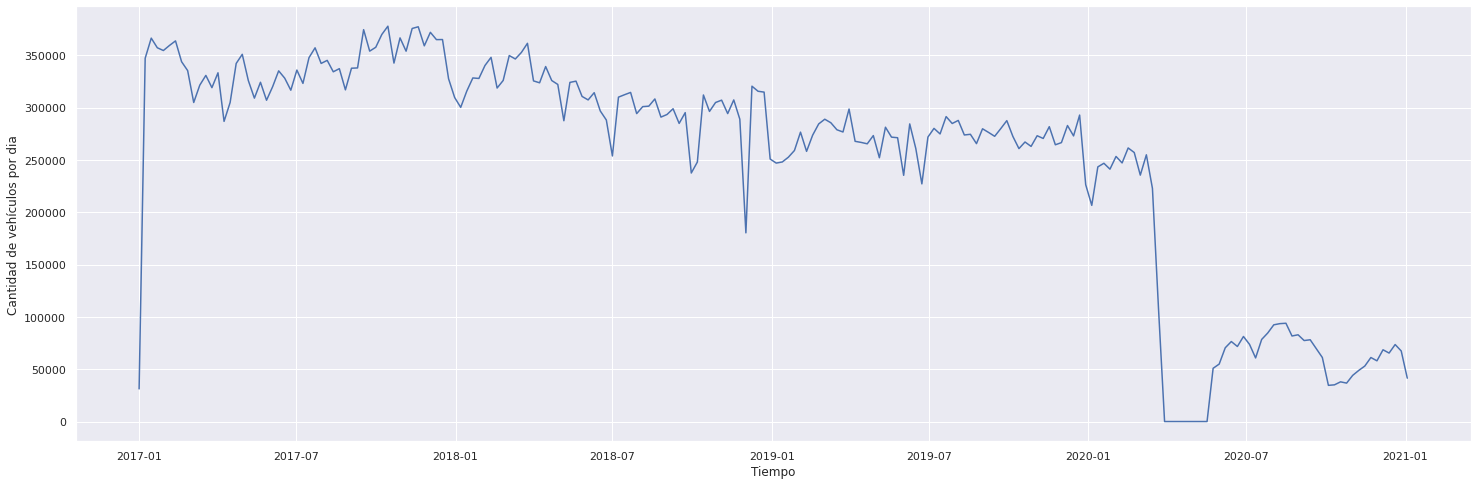

In [168]:
plt.figure(figsize = (25,8))
plt.plot(dataset_Ilia_semanal_x1.index, dataset_Ilia_semanal_x1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por dia')
plt.show()

<font color=blue> En la grafica de series podemos destacar la gran caida que se da entre los meses de marzo y abril, esto coincide historicamente con el inicio de la pandemia COVID19, donde se dio un gran confinamiento a partir de marzo de 2020, dando una desacelariento por la no circulación de las personas pro los cierres generados.

<font color=blue> **Esta es la razón de por qué para predecir 2020 solo vamos a tomar los datos del primer trimestre. vuelvo a filtrar**

In [198]:
# Filtro por estaciòn Ilia y forma de pago igual a efectivo
dataset_flujovehicular_x1['fecha'] = pd.to_datetime(dataset_flujovehicular_x1['fecha'])
filtered_Ilia_efectivo_x2=dataset_flujovehicular_x1.query("(estacion == 'ILLIA' or estacion == 'Illia'  ) and (forma_pago =='Efectivo' or forma_pago =='EFECTIVO') and (fecha >= '2019-09-01' and fecha <'2020-03-20' )")
filtered_Ilia_efectivo_x2

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes,dia_fecha,observacion
16414,2019.000,2019-09-01,0.000,1.000,Domingo,Illia,Centro,Liviano,EFECTIVO,305.000,NaN,nan,NaN
16420,2019.000,2019-09-01,0.000,1.000,Domingo,Illia,Centro,Pesado,EFECTIVO,16.000,NaN,nan,NaN
16423,2019.000,2019-09-01,0.000,1.000,Domingo,Illia,Provincia,Liviano,EFECTIVO,327.000,NaN,nan,NaN
16429,2019.000,2019-09-01,0.000,1.000,Domingo,Illia,Provincia,Pesado,EFECTIVO,7.000,NaN,nan,NaN
16491,2019.000,2019-09-01,1.000,2.000,Domingo,Illia,Centro,Liviano,EFECTIVO,195.000,NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632723,2020.000,2020-03-19,12.000,13.000,Jueves,ILLIA,Centro,Pesados 5 Ejes,Efectivo,1.000,marzo,19.000,Efectivo
632724,2020.000,2020-03-19,12.000,13.000,Jueves,ILLIA,Provincia,Pesados 5 Ejes,Efectivo,1.000,marzo,19.000,Efectivo
632773,2020.000,2020-03-19,13.000,14.000,Jueves,ILLIA,Centro,Pesados 5 Ejes,Efectivo,2.000,marzo,19.000,Efectivo
632909,2020.000,2020-03-19,16.000,17.000,Jueves,ILLIA,Centro,Pesados 5 Ejes,Efectivo,1.000,marzo,19.000,Efectivo


<font color=blue> **Reesample nuevamente con la nueva data filtrad**  

In [199]:
dataset_Ilia_semanal_x2 = filtered_Ilia_efectivo_x2.resample('W', on = 'fecha').sum()
print(dataset_Ilia_semanal_x2.shape)
dataset_Ilia_semanal_x2.drop(columns=['periodo','hora_inicio','hora_fin', 'dia_fecha'], inplace = True)
dataset_Ilia_semanal_x2

(30, 5)


,cantidad_pasos
fecha,
2019-09-01,40473.000
2019-09-08,276271.000
2019-09-15,272592.000
2019-09-22,279927.000
2019-09-29,287568.000
2019-10-06,272483.000
2019-10-13,260840.000
2019-10-20,267147.000
2019-10-27,262950.000


<font color=blue> **Outlier dataset  con nuevos datos del 2020**

In [200]:
q25,q75 = np.percentile(dataset_Ilia_semanal_x2.cantidad_pasos, [25,75])
iqr = q75 - q25
minimo_m = q25 - 1.5*iqr
maximo_m = q75 + 1.5*iqr
print('**Outliers Frecuencia semanal**')
print('q25 =',q25)
print ('q75=',q75)
print( 'iqr=',iqr)
print( 'minimo_m=', minimo_m) 
print( 'maximo_m=', maximo_m)

**Outliers Frecuencia semanal**
q25 = 244223.75
q75= 272868.0
iqr= 28644.25
minimo_m= 201257.375
maximo_m= 315834.375


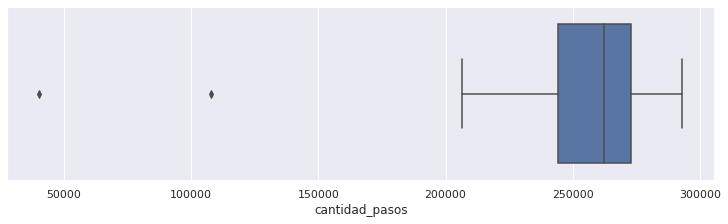

In [201]:
fig,(ax1) = plt.subplots(1,constrained_layout=True,figsize=(10,3))

sns.boxplot(data=dataset_Ilia_semanal_x2,x="cantidad_pasos",ax=ax1)

In [202]:
result =dataset_Ilia_semanal_x2.cantidad_pasos < minimo_m
print(result.value_counts())

False    28
True      2
Name: cantidad_pasos, dtype: int64


In [203]:
result =dataset_Ilia_semanal_x2.cantidad_pasos > maximo_m
print(result.value_counts())

False    30
Name: cantidad_pasos, dtype: int64


In [204]:
mascara_outliers_m = (dataset_Ilia_semanal_x2.cantidad_pasos  < minimo_m) | (dataset_Ilia_semanal_x2.cantidad_pasos  > maximo_m)
mascara_outliers_m.sum()


2

In [205]:
dataset_Ilia_semanal_x2.cantidad_pasos[mascara_outliers_m]

fecha
2019-09-01    40473.000
2020-03-22   107855.000
Name: cantidad_pasos, dtype: float64

<font color=blue> **Nuevo dataset**

In [206]:
dataset_Ilia_x2= dataset_Ilia_semanal_x2[(dataset_Ilia_semanal_x2.cantidad_pasos > minimo_m) &(dataset_Ilia_semanal_x2.cantidad_pasos < maximo_m) ]
dataset_Ilia_x2

,cantidad_pasos
fecha,
2019-09-08,276271.000
2019-09-15,272592.000
2019-09-22,279927.000
2019-09-29,287568.000
2019-10-06,272483.000
2019-10-13,260840.000
2019-10-20,267147.000
2019-10-27,262950.000
2019-11-03,273129.000


In [207]:
dataset_Ilia_x2.describe()
dataset_Ilia_x2.shape

(28, 1)

####<font color=blue> **b. Vamos a formar la matriz de datos con las semanas que necesitamos para predecir:**

In [208]:
senial2 = dataset_Ilia_x2.cantidad_pasos
senial2.count()


28

<font color=blue> Definir cuántos valores hacia atrás tomaremos.

In [209]:
look_back = 12# Numero de semanas anteriores para predecir el valor siguiente.
look_back


12

In [210]:
N = senial2.shape[0]
N

28

<font color=blue>  Creamos los X e y con ceros para luego llenar con los datos. Notar los shape

In [211]:
model_prediccion = dataset_Ilia_x2.cantidad_pasos

In [213]:
X_validacion2 = np.zeros((28,12))
X_validacion2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [214]:
for i in range(12):
  X_validacion2[i,:] = model_prediccion.iloc[i:i+look_back]
  #y[i] = modelo_observados.iloc[i+look_back]

In [215]:
X_validacion2.shape

(28, 12)

 <font color=blue> Llenamos los X e y

####<font color=blue> **c. Entrenar Modelo Benchmark-DecisionTreeRegressor con los nuevos datos adicionados del 2020** 

In [216]:
y_pred_2020 = tree_benchmark_best.predict(X_validacion2)
y_pred_2020.shape


(28,)

 <font color=blue> **Calculamos el error**

In [217]:
MSE_bench_validacion= mean_squared_error(model_prediccion, y_pred_2020)
RMSE_bench_validacion = np.sqrt(MSE_bench_validacion)
print('Error en Train para el benchmark:',RMSE_bench_validacion)


Error en Train para el benchmark: 34629.42255341656


####<font color=blue> **d. Entrenar Modelo randomForest con los nuevos datos adicionados del 2020** 

In [219]:
y_predict_2020_rf = model_rf_best.predict(X_validacion2)


 <font color=blue> **Calculamos el error**

In [220]:
MSE_rf_validacion= mean_squared_error(model_prediccion, y_predict_2020_rf)
RMSE_rf_validacion = np.sqrt(MSE_bench_validacion)
print('Error en Train para el random:',RMSE_rf_validacion)

Error en Train para el random: 34629.42255341656


# <font color=blue> **Parte C - Investigación**

<font color=blue>  El objetivo de esta sección es que sugieras cómo continuarías el proyecto, con el fin de mejorar el modelo o responder una pregunta que consideres interesante


**¿Qué me gustaría lograr para el siguiente trabajo?:**

Podría evaluar de ser posible, todas las modalidades de pago e investigaría cuales ya van de salida, cuáles siguen creciendo o se mantienen, cuáles se usan menos, de qué depende el usar o no otros medios de pago.

Para ello, me gustaría seguir explorando redes neuronales. 

Durante nuestras clases se mencionó por parte del tutor:
Arima, Prophet , LSTM

LSTM Multivariable https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

Redes neuronales con Embeddings https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526

https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-prophet-5015928e402a

####<font color=green> **¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?**



<font color=blue>  Se podrìa usar  **técnicas de encoding ** usando los métodos como **OneHotEncoder**, **LabelEncoder**.


<font color=blue> La estrategia que implementa es crear una columna para cada valor distinto que exista en la característica que estamos codificando (ejemplo: tipo de vehículo, forma de pago, sentido, día de la semana ) y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

<font color=blue> COn otras variables que nos ayuden a predecir seguramente mejoran las predicciones. Así los modelos tendrían más información que solo la  cantidad de vehículos que pasan y  permitirá tomar decisiones más acertadas posiblemente, como sabemos en ciencia de datos se sabe es probando.

<font color=blue> Para tener modelos con más información, es importante que el modelo tenga buen número de campos, pero ojo, correríamos el riesgo de sobreajustar el modelo.
 
<font color=blue> Se debería estudiar y analizar cuales serian las variables más acertadas que mejoren el modelo sin sobreajustarlo y de esa forma encontrar el equilibrio buscado.


####<font color=green> **¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?**

<font color=blue> * Exploremos nuevamente los dataser, pero sin filtrar por estacion  y forma de pago

In [223]:
print('Estaciones en 2020')
print(data_FlujoVehicular_2020['estacion'].unique())
print('\nEstaciones en 2019')
print(data_FlujoVehicular_2019['estacion'].unique())
print('\nEstaciones en 2018')
print(data_FlujoVehicular_2018['estacion'].unique())
print('\nEstaciones en 2017')
print(data_FlujoVehicular_2017['estacion'].unique())


Estaciones en 2020
['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']

Estaciones en 2019
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']

Estaciones en 2018
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

Estaciones en 2017
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


<font color=blue> * Unimos los dataset

In [224]:
data_completa = pd.concat([data_FlujoVehicular_2020,data_FlujoVehicular_2019,data_FlujoVehicular_2018,data_FlujoVehicular_2017])

#### <font color=blue>  **Filtrando el Dataset:**

In [227]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_completa['fecha2'] = pd.to_datetime(data_completa.fecha) + pd.to_timedelta(data_completa.hora_fin, unit = 'h')

#Quitamos las columnas que ya no vamos a utilizar
data_completa.drop(columns=['periodo','mes','dia','dia_fecha','observacion','sentido','fecha','hora_inicio','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
data_completa.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
data_completa.sort_values('fecha', inplace = True)
data_completa.reset_index(drop=True, inplace = True)

data_completa

,estacion,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Avellaneda,Liviano,NO COBRADO,36.000,2017-01-01 00:00:00
1,Dellepiane Liniers,Liviano,INFRACCION,3.000,2017-01-01 00:00:00
2,Dellepiane Liniers,Liviano,TELEPASE,141.000,2017-01-01 00:00:00
3,Dellepiane Liniers,Pesado,EXENTO,2.000,2017-01-01 00:00:00
4,Dellepiane Liniers,Pesado,EFECTIVO,16.000,2017-01-01 00:00:00
...,...,...,...,...,...
6094444,DELLEPIANE LINIERS,Auto,Tag,170.000,2020-12-31 23:00:00
6094445,DELLEPIANE LINIERS,Auto,Mercado Pago,6.000,2020-12-31 23:00:00
6094446,DELLEPIANE LINIERS,Auto,Mercado Pago,8.000,2020-12-31 23:00:00
6094447,ILLIA,Auto,Mercado Pago,3.000,2020-12-31 23:00:00


<font color=blue> * consultamos formas de pago

In [228]:
data_completa['forma_pago'] = data_completa['forma_pago'].str.title()
data_completa['forma_pago'].unique()

array(['No Cobrado', 'Infraccion', 'Telepase', 'Exento', 'Efectivo',
       'Tarjeta Discapacidad', 'Monedero', 'Otros', 'T. Discapacidad',
       'Tag', 'Rec.Deuda', 'Violación', 'Tarjeta Magnética', 'Cpp',
       'Mercado Pago'], dtype=object)

<font color=blue> * consultamos estaciones y las unificos

In [233]:
data_completa['estacion'] = data_completa['estacion'].replace({
    'Dellepiane Liniers': 'Dellepiane',
    'Dellepiane Centro': 'Dellepiane',
    'Dellepiane Linierslepiane Centro':'Dellepiane',
    'Dellepiane Linierslepiane Centro':'Dellepiane',
    'Pb1':'PDB',
    'Pb2':'PDB',
    'Pb3':'PDB',
    'Pb4':'PDB',
    'Pdb':'PDB',
    'PB1':'PDB',
    'PB2':'PDB',
    'PB3':'PDB',
    'PB4':'PDB',
    'Ilp':'Illia',
    'ILLIA':'Illia',
    'Alberti': 'Alberdi',
     'AVELLANEDA':'Avellaneda',
     'DELLEPIANE LINIERSLEPIANE CENTRO':'Dellepiane',
      'DELLEPIANE LINIERS':'Dellepiane',
      'DELLEPIANE LINIERS':'Dellepiane',
      'SARMIENTO':'Sarmiento',
      'SALGUERO':'Salguero',
      'ALBERDI':'Alberdi',
      'RETIRO':'Retiro'
})
data_completa['estacion'].unique()

array(['Avellaneda', 'Dellepiane', 'Illia', 'Retiro', 'Salguero',
       'Alberdi', 'Sarmiento', 'PDB', 'ILP'], dtype=object)

#### <font color=blue>  **Generar Serie de Tiempos Mensuales:**

In [238]:
data_Illia = data_completa[data_completa.estacion == 'Illia']
data_Illia_st = pd.DataFrame()
data_Illia_st = data_Illia.resample('m', on = 'fecha').sum()
data_Illia_g = data_Illia_st.reset_index()

data_Dellepiane = data_completa[data_completa.estacion == 'Dellepiane']
data_Dellepiane_st = pd.DataFrame()
data_Dellepiane_st = data_Dellepiane.resample('m', on = 'fecha').sum()
data_Dellepiane_g = data_Dellepiane_st.reset_index()

data_Alberdi = data_completa[data_completa.estacion == 'Alberdi']
data_Alberdi_st = pd.DataFrame()
data_Alberdi_st = data_Alberdi.resample('m', on = 'fecha').sum()
data_Alberdi_g = data_Alberdi_st.reset_index()


data_Retiro = data_completa[data_completa.estacion == 'Retiro']
data_Retiros_st = pd.DataFrame()
data_Retiros_st = data_Retiro.resample('m', on = 'fecha').sum()
data_Retiros_g = data_Retiros_st.reset_index()


data_Sarmiento = data_completa[data_completa.estacion == 'Sarmiento']
data_Sarmientos_st = pd.DataFrame()
data_Sarmientos_st = data_Sarmiento.resample('m', on = 'fecha').sum()
data_Sarmientos_g = data_Sarmientos_st.reset_index()


data_Avellaneda= data_completa[data_completa.estacion == 'Avellaneda']
data_Avellanedas_st = pd.DataFrame()
data_Avellanedas_st = data_Avellaneda.resample('m', on = 'fecha').sum()
data_Avellanedas_g = data_Avellanedas_st.reset_index()



data_Salguero= data_completa[data_completa.estacion == 'Salguero']
data_Salgueros_st = pd.DataFrame()
data_Salgueros_st = data_Salguero.resample('m', on = 'fecha').sum()
data_Salgueros_g = data_Salgueros_st.reset_index()

data_PDB= data_completa[data_completa.estacion == 'PDB']
data_PDB_st = pd.DataFrame()
data_PDB_st = data_PDB.resample('m', on = 'fecha').sum()
data_PDB_g = data_PDB_st.reset_index()

In [242]:
# Plot 
fig_station = go.Figure()

fig_station.add_trace(go.Scatter(x=data_Illia_g['fecha'], y=data_Illia_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='Illia'))
fig_station.add_trace(go.Scatter(x=data_Dellepiane_g['fecha'], y=data_Dellepiane_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='Dellepiane'))
fig_station.add_trace(go.Scatter(x=data_Alberdi_g['fecha'], y=data_Alberdi_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='Alberdi'))
fig_station.add_trace(go.Scatter(x=data_Retiros_g['fecha'], y=data_Retiros_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='Retiro'))
fig_station.add_trace(go.Scatter(x=data_Sarmientos_g['fecha'], y=data_Sarmientos_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='Sarmiento'))
fig_station.add_trace(go.Scatter(x=data_Avellanedas_g['fecha'], y=data_Avellanedas_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='Avellaneda'))
fig_station.add_trace(go.Scatter(x=data_Salgueros_g['fecha'], y=data_Salgueros_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='Salguero'))
fig_station.add_trace(go.Scatter(x=data_PDB_g['fecha'], y=data_PDB_g['cantidad_pasos'],
                    mode='lines+markers',
                    name='PDB'))

fig_station.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_station.update_layout(
    title="Tránsito vehicular AUSA 2017 a 2020",
    width=900,
    height=500,
)
fig_station.show()

<font color=blue> Conclusiones:

<font color=blue> * El 2020 fue un año atipico,debido al confinamiento (por covid), cambió el trafico vehicular debido a las restricciones.

<font color=blue>  * El pico negativo de abril del 2020 que genera una alza en los meses subsiguientes.

<font color=blue> * (Investigando) La inaguración del Paseo del Bajo, donde se aprecia entre los meses de junio de 2019 a Diciembre de 2020 una gran afluencia de vehículos.

<font color=blue> También podemos decir que hay 3 grandes grupos de afluencia:

<font color=blue> * Alta: La Au Avellaneda lleva la punta duplicando la <font color=blue> *cantidad de pasos de las del grupo de las medianas.

<font color=blue> *Mediana: La AU Dellepianne y la AU Illia tienen una afulencia similar.

<font color=blue> *Baja: Finalmente Alberdi, Salguero y Retiro se mantienen como las AU con menor afluencia.


####<font color=green> **Preguntas adicionales que se nos plantearon:**



<font color=blue> **¿Qué información está usando el modelo para predecir?** Mi modelos está usando 12 semanas para predecir, lo que quiere decir que con 14 semanas es capaz de predecir lo que va a ocurrir en la semana siguiente.

<font color=blue> **Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?**  En el aparatado ***6.   Utiliza el modelo creado para predecir el tráfico en el año 2020.** se trabao este tema

<font color=blue> **Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?** Por ahora no agregué al modelo resultados anteriores a 2017, dadas las condiciones que se nos presentaron para este trabajo, posiblemente para el siguiente lo haga.